In [1]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import importlib.util
import numpy as np 
import seaborn as sns
import pickle
import scipy.stats as stats
from scipy.optimize import curve_fit
from numpy import array 
from statsmodels.stats.weightstats import ttest_ind
import math

In [2]:
def poly_7(x, a, b, c, d, e, f, g, h):
    return a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h

def poly_6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g
def poly_5(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f 


In [3]:
anor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/nor.pickle', "rb"))
arth = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/rheumatoid_arthritis.pickle', "rb"))


In [4]:
ibs_datainfo = pd.read_excel(r'/Users/xiaoyuemei/Downloads/IBS_meta.xlsx', 'Sheet1')


In [5]:
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')


In [5]:
ibs_datainfo.source_name_ch1.unique()

array(['CD8', 'CD4', 'WB', 'CD14', 'n4', 'monocytes', 'wh blood',
       'Whole blood'], dtype=object)

In [16]:
ibs_age = ibs_age.set_index('Unnamed: 0')

In [17]:
ibs['status'] = ibs_age['Disease State']
ibs['Age'] = ibs_age['Age']

In [18]:
ibs

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,status,Age
GSM2336818,0.484840,0.904301,0.706628,0.268115,0.696812,0.552807,0.731842,0.355477,0.351903,0.045642,...,0.555363,0.532696,0.508120,0.259912,0.557469,0.902920,0.806501,0.722293,CD,19.1
GSM2336819,0.549209,0.899991,0.757192,0.254714,0.782396,0.537098,0.826841,0.343745,0.383886,0.043136,...,0.485624,0.942371,0.488452,0.855391,0.581672,0.922380,0.817588,0.797783,HC,30.8
GSM2336820,0.665182,0.910282,0.814520,0.241178,0.776249,0.676952,0.871598,0.327974,0.418875,0.040509,...,0.693259,0.540354,0.637202,0.640432,0.578289,0.566337,0.387525,0.860193,UC,58.4
GSM2336821,0.536237,0.898268,0.796119,0.244020,0.723803,0.561323,0.829576,0.283472,0.408616,0.046047,...,0.522881,0.536366,0.920109,0.113204,0.602383,0.079792,0.571661,0.848829,CD,21.1
GSM2336822,0.450374,0.906696,0.776311,0.250357,0.726807,0.578344,0.777413,0.261513,0.396494,0.044639,...,0.524525,0.940133,0.469027,0.596338,0.561113,0.522132,0.610090,0.641714,CD,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2337053,0.754166,0.924941,0.826363,0.278728,0.859885,0.658426,0.895978,0.461872,0.472104,0.043561,...,0.470220,0.608104,0.535429,0.111257,0.916240,0.492598,0.159320,0.703948,CD,30.3
GSM2337054,0.544069,0.922609,0.834624,0.280992,0.713173,0.659256,0.802371,0.300417,0.427558,0.051920,...,0.136502,0.945212,0.530844,0.899833,0.105268,0.516616,0.168397,0.856872,UC,26.5
GSM2337055,0.574472,0.930687,0.836744,0.268772,0.769004,0.707079,0.853384,0.290878,0.466079,0.057271,...,0.114142,0.063007,0.060613,0.580962,0.604596,0.070221,0.543221,0.678708,HC,27.3
GSM2337056,0.538766,0.937964,0.865123,0.271731,0.762731,0.784256,0.871394,0.294934,0.391865,0.053007,...,0.476765,0.947183,0.926799,0.094965,0.570425,0.075604,0.899900,0.897679,UC,19.1


In [19]:
ibs_wb_gses = ibs_datainfo[(ibs_datainfo['source_name_ch1'] == 'wh blood') | 
             (ibs_datainfo['source_name_ch1'] == 'Whole blood') | 
             (ibs_datainfo['source_name_ch1'] == 'WB')]
ibs_wb_gen_gses = ibs_wb_gses[(ibs_wb_gses['type'] == 'genomic') ]
ibs_wb_inonlyori = ibs.T[ibs.index.intersection(ibs_wb_gses['Unnamed: 0'])].T
ibs_nor = ibs_wb_inonlyori[ibs_wb_inonlyori['status']=='HC']
ibs_nor['dataset'] = 'ibs_nor'

ibs_dis = ibs_wb_inonlyori[ibs_wb_inonlyori['status']!='HC']
ibs_dis['dataset'] = 'ibs_dis'
ibs_nor = ibs_nor[ibs_nor['Age']>24]
ibs_dis = ibs_dis[ibs_dis['Age']>24]

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_10553/3302772433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_nor['dataset'] = 'ibs_nor'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_10553/3302772433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_dis['dataset'] = 'ibs_dis'


In [20]:
ibs_wb_inonlyori

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,status,Age
GSM2336819,0.549209,0.899991,0.757192,0.254714,0.782396,0.537098,0.826841,0.343745,0.383886,0.043136,...,0.485624,0.942371,0.488452,0.855391,0.581672,0.92238,0.817588,0.797783,HC,30.8
GSM2336821,0.536237,0.898268,0.796119,0.24402,0.723803,0.561323,0.829576,0.283472,0.408616,0.046047,...,0.522881,0.536366,0.920109,0.113204,0.602383,0.079792,0.571661,0.848829,CD,21.1
GSM2336827,0.519933,0.906677,0.706958,0.241028,0.74487,0.542393,0.821062,0.351254,0.371266,0.04357,...,0.503136,0.944359,0.919438,0.844187,0.929128,0.920838,0.823921,0.760134,HC,30.7
GSM2336832,0.549741,0.899432,0.795014,0.286338,0.767504,0.552438,0.828324,0.282016,0.365323,0.048341,...,0.513388,0.070074,0.921308,0.613464,0.588418,0.509357,0.212338,0.849751,CD,42.1
GSM2336833,0.5526,0.905726,0.805958,0.263665,0.739862,0.588939,0.834798,0.390893,0.372192,0.045892,...,0.520497,0.539608,0.490323,0.876,0.585221,0.513731,0.590028,0.836758,HC,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2337044,0.523339,0.933818,0.834278,0.329846,0.734903,0.702135,0.832466,0.315747,0.394558,0.046274,...,0.496994,0.951697,0.934524,0.578595,0.602641,0.072439,0.560174,0.884999,UC,30.8
GSM2337048,0.549814,0.928072,0.853179,0.27892,0.803182,0.699602,0.863693,0.31491,0.443918,0.055813,...,0.874252,0.588243,0.520405,0.921257,0.129862,0.519094,0.594959,0.876624,UC,62.4
GSM2337055,0.574472,0.930687,0.836744,0.268772,0.769004,0.707079,0.853384,0.290878,0.466079,0.057271,...,0.114142,0.063007,0.060613,0.580962,0.604596,0.070221,0.543221,0.678708,HC,27.3
GSM2337056,0.538766,0.937964,0.865123,0.271731,0.762731,0.784256,0.871394,0.294934,0.391865,0.053007,...,0.476765,0.947183,0.926799,0.094965,0.570425,0.075604,0.8999,0.897679,UC,19.1


In [24]:
ibs_nor.to_pickle('/Users/xiaoyuemei/Downloads/GSE87640_IBS_H.pkl')


In [25]:
ibs_dis.to_pickle('/Users/xiaoyuemei/Downloads/GSE87640_IBS_D.pkl')

In [146]:


ibs_dis = ibs_dis[ibs_dis['Age']>24]
ibs_dis['age_group'] = pd.cut(
    ibs_dis['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_nor = ibs_nor[ibs_nor['Age']>24]
ibs_nor['age_group'] = pd.cut(
    ibs_nor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_dis460 = ibs_dis[cpgs460]
ibs_nor460 = ibs_nor[cpgs460]

In [79]:
ibs_dis.groupby('age_group').count()['cg00000108']

age_group
25-28    7
29-32    3
33-36    3
37-40    5
41-44    3
45-48    0
49-52    3
53-54    1
55-56    0
57-60    3
61-64    2
65-68    0
69-72    0
73-76    0
77-80    0
>80      0
Name: cg00000108, dtype: int64

In [82]:
ibs_nor.groupby('age_group').count()['cg00000108']

age_group
25-28    4
29-32    9
33-36    3
37-40    1
41-44    4
45-48    0
49-52    1
53-54    0
55-56    1
57-60    1
61-64    0
65-68    0
69-72    0
73-76    0
77-80    0
>80      0
Name: cg00000108, dtype: int64

In [35]:
# ibs_gse87648 = pd.read_csv('/Users/xiaoyuemei/Downloads/GSE87648_processedMethWb.txt', sep="\t").T
# ibs_gse87648['status'].to_frame().to_excel("/Users/xiaoyuemei/Downloads/ibs_gse87648_status.xlsx", sheet_name='Sheet1')
# ibs_align = pd.read_excel(r'/Users/xiaoyuemei/Downloads/aligned.xlsx','Sheet 1')
# ibs_align 
# ibs_align['ID'] = ibs_align['ID'].astype('string')
# ibs_gse87648.reset_index()['index'] = ibs_gse87648.reset_index()['index'].astype('string')
# ibs_gse87648['status'] = ibs_align.set_index('ID')['Health_Status']
# ibs_gse87648['age'] = ibs_align.set_index('ID')['Age']
# ibs_gse87648_dis = ibs_gse87648[(ibs_gse87648['status']== "CD") | (ibs_gse87648['status']== "UC")]
# ibs_gse87648_nor = ibs_gse87648[(ibs_gse87648['status']== "HL") | (ibs_gse87648['status']== "HS")]
# ibs_gse87648_dis = ibs_gse87648_dis[ibs_gse87648_dis['age']>24]
# ibs_gse87648_dis['age_group'] = pd.cut(
#     ibs_gse87648_dis['age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])
# ibs_gse87648_nor = ibs_gse87648_nor[ibs_gse87648_nor['age']>24]
# ibs_gse87648_nor['age_group'] = pd.cut(
#     ibs_gse87648_nor['age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])
# ibs_gse87648_nor460 = ibs_gse87648_nor[ibs_gse87648_nor.columns.intersection(cpgs460)]
# ibs_gse87648_dis460 = ibs_gse87648_dis[ibs_gse87648_dis.columns.intersection(cpgs460)]
# ibs_gse87648_nor460_sum = ibs_gse87648_nor460.groupby('age_group').std().sum(axis=1).to_frame()
# ibs_gse87648_nor460_sum[0] = ibs_gse87648_nor460_sum[0].replace(0, np.nan)

# ibs_gse87648_dis460_sum = ibs_gse87648_dis460.groupby('age_group').std().sum(axis=1).to_frame()
# ibs_gse87648_dis460_sum[0] = ibs_gse87648_dis460_sum[0].replace(0, np.nan)



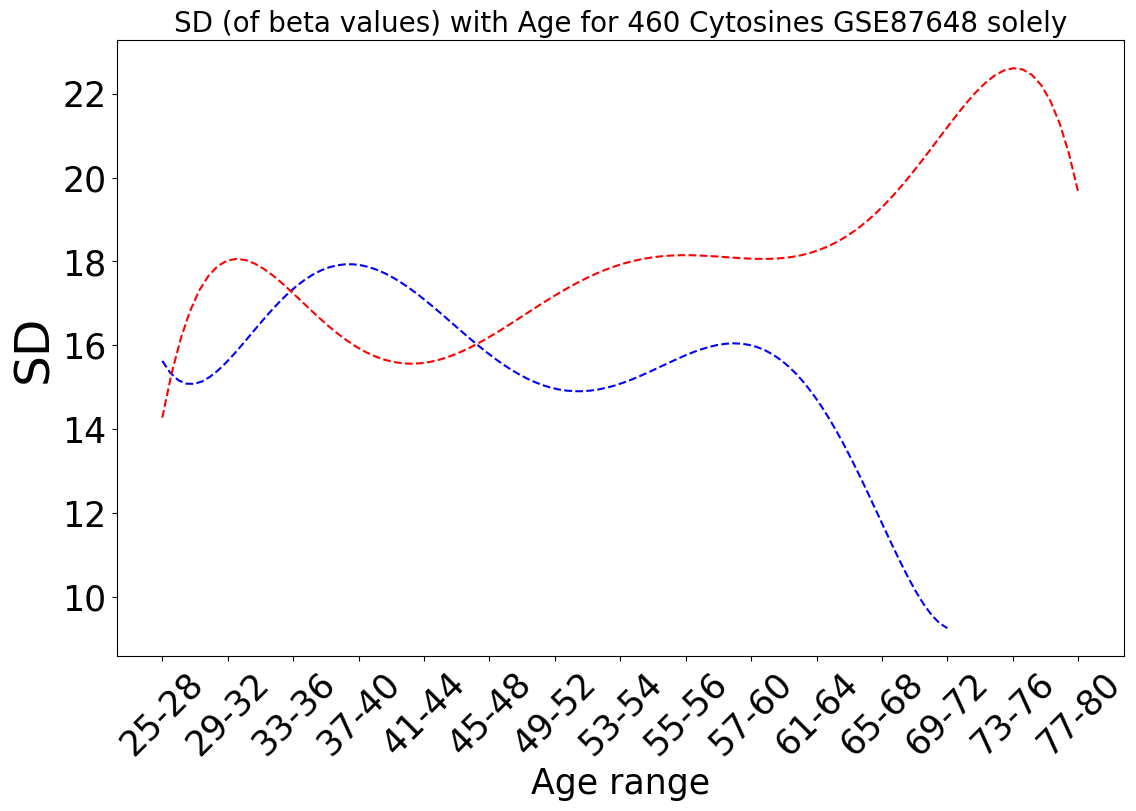

In [139]:
x = np.array(np.arange(16))
my_xticks = ibs_gse87648_nor460_sum.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, ibs_gse87648_nor460_sum[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)


plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.title("SD (of beta values) with Age for 460 Cytosines GSE87648 solely", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, ibs_gse87648_dis460_sum[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)


plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
# plt.locator_params(axis='y', nbins=5)

plt.show()

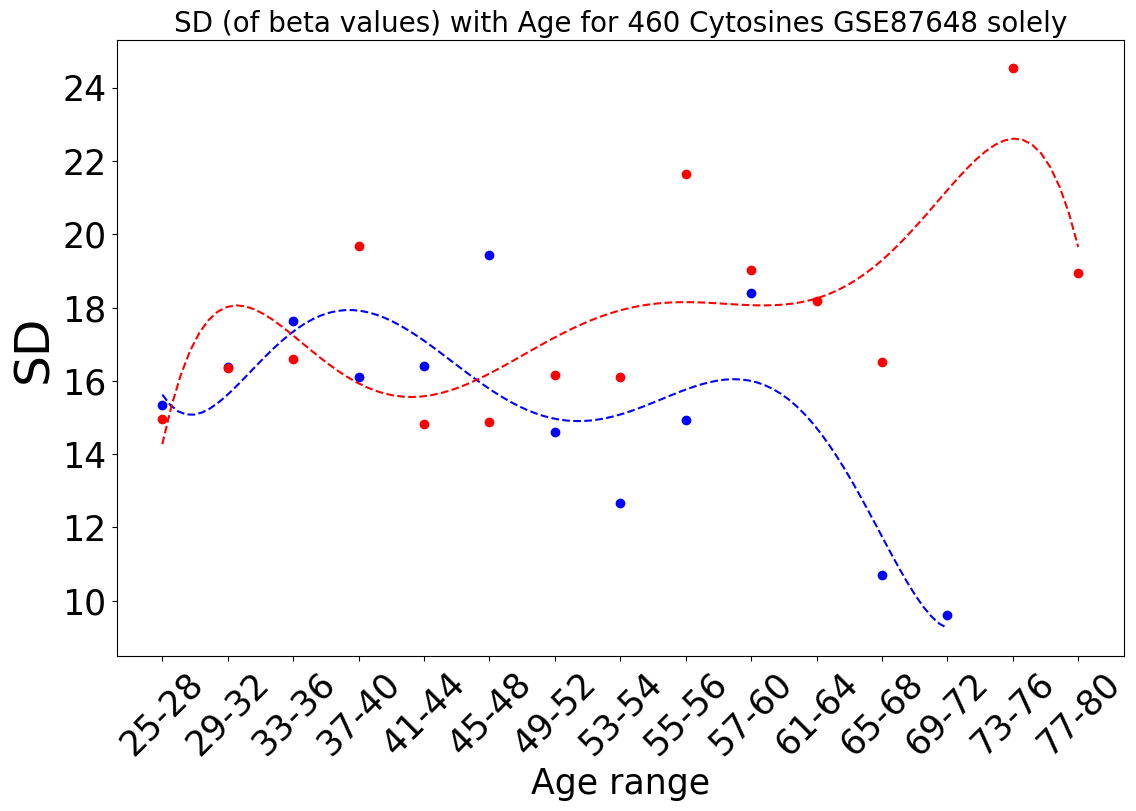

In [138]:
x = np.array(np.arange(16))
my_xticks = ibs_gse87648_nor460_sum.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, ibs_gse87648_nor460_sum[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)

plt.scatter(x, ibs_gse87648_nor460_sum[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.title("SD (of beta values) with Age for 460 Cytosines GSE87648 solely", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, ibs_gse87648_dis460_sum[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)

plt.scatter(x, ibs_gse87648_dis460_sum[0], color = 'r')
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
# plt.locator_params(axis='y', nbins=5)

plt.show()

In [160]:
ibs_nor_concated = pd.concat([ibs_nor460, ibs_gse87648_nor460], ignore_index=True).dropna(axis=1)


In [54]:
ibs_dis

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,Age,status,dataset,age_group
GSM2336832,0.549741,0.899432,0.795014,0.286338,0.767504,0.552438,0.828324,0.282016,0.365323,0.048341,...,0.921308,0.613464,0.588418,0.509357,0.212338,0.849751,42.1,CD,ibs_dis,41-44
GSM2336834,0.547368,0.903526,0.763479,0.25635,0.755042,0.550666,0.846628,0.307893,0.377271,0.045629,...,0.499156,0.629431,0.554334,0.520156,0.819954,0.813065,63.7,CD,ibs_dis,61-64
GSM2336840,0.541137,0.908998,0.788836,0.294226,0.770154,0.607374,0.826482,0.300216,0.386122,0.041238,...,0.063069,0.601617,0.105412,0.086457,0.586673,0.854328,27.9,CD,ibs_dis,25-28
GSM2336852,0.59756,0.903197,0.801382,0.269748,0.75306,0.616921,0.816276,0.383757,0.3956,0.042647,...,0.928244,0.621529,0.563496,0.921112,0.189469,0.651282,33.4,CD,ibs_dis,33-36
GSM2336854,0.530645,0.915744,0.821899,0.250332,0.686441,0.57417,0.826308,0.326487,0.390867,0.050703,...,0.061821,0.89297,0.092066,0.535875,0.569426,0.675044,31.3,UC,ibs_dis,29-32
GSM2336870,0.524468,0.902584,0.769588,0.23916,0.744276,0.572952,0.814722,0.291636,0.359797,0.047613,...,0.511328,0.55967,0.551385,0.076154,0.197215,0.876193,38.0,UC,ibs_dis,37-40
GSM2336878,0.577904,0.911579,0.795905,0.279599,0.787155,0.589451,0.853359,0.440465,0.420051,0.040874,...,0.51065,0.168489,0.927134,0.519495,0.217318,0.690688,30.3,CD,ibs_dis,29-32
GSM2336880,0.540345,0.918125,0.834213,0.298378,0.739126,0.597246,0.824074,0.358834,0.390473,0.046747,...,0.476525,0.594284,0.102987,0.533508,0.186428,0.888869,24.3,UC,ibs_dis,25-28
GSM2336882,0.434531,0.907832,0.777332,0.211037,0.740904,0.607416,0.787627,0.264827,0.35853,0.038514,...,0.489815,0.886735,0.100844,0.524117,0.189785,0.821124,36.8,CD,ibs_dis,37-40
GSM2336886,0.511409,0.922535,0.801611,0.276704,0.734199,0.619285,0.82218,0.313293,0.361501,0.043993,...,0.920555,0.884573,0.572438,0.090311,0.582564,0.669207,50.7,UC,ibs_dis,49-52


In [162]:
ibs_dis_concated = pd.concat([ibs_dis460, ibs_gse87648_dis460], ignore_index=True).dropna(axis=1)

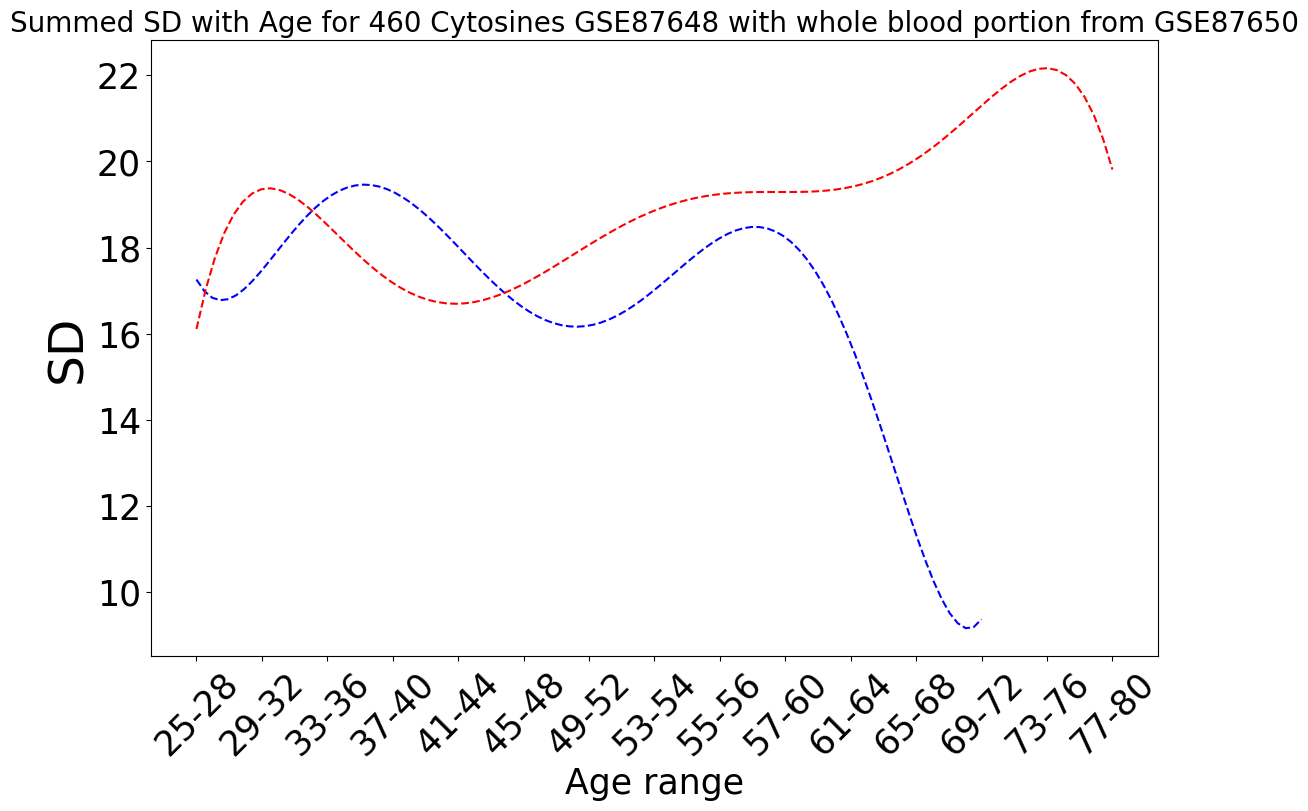

In [170]:

ibs_nor460_sum_concat = ibs_nor_concated.groupby('age_group').std().sum(axis=1).to_frame()
ibs_nor460_sum_concat[0] = ibs_nor460_sum_concat[0].replace(0, np.nan)

ibs_dis460_sum_concat = ibs_dis_concated.groupby('age_group').std().sum(axis=1).to_frame()
ibs_dis460_sum_concat[0] = ibs_dis460_sum_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = ibs_dis460_sum_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, ibs_nor460_sum_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)


plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, ibs_dis460_sum_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)


plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
# plt.locator_params(axis='y', nbins=5)

plt.show()


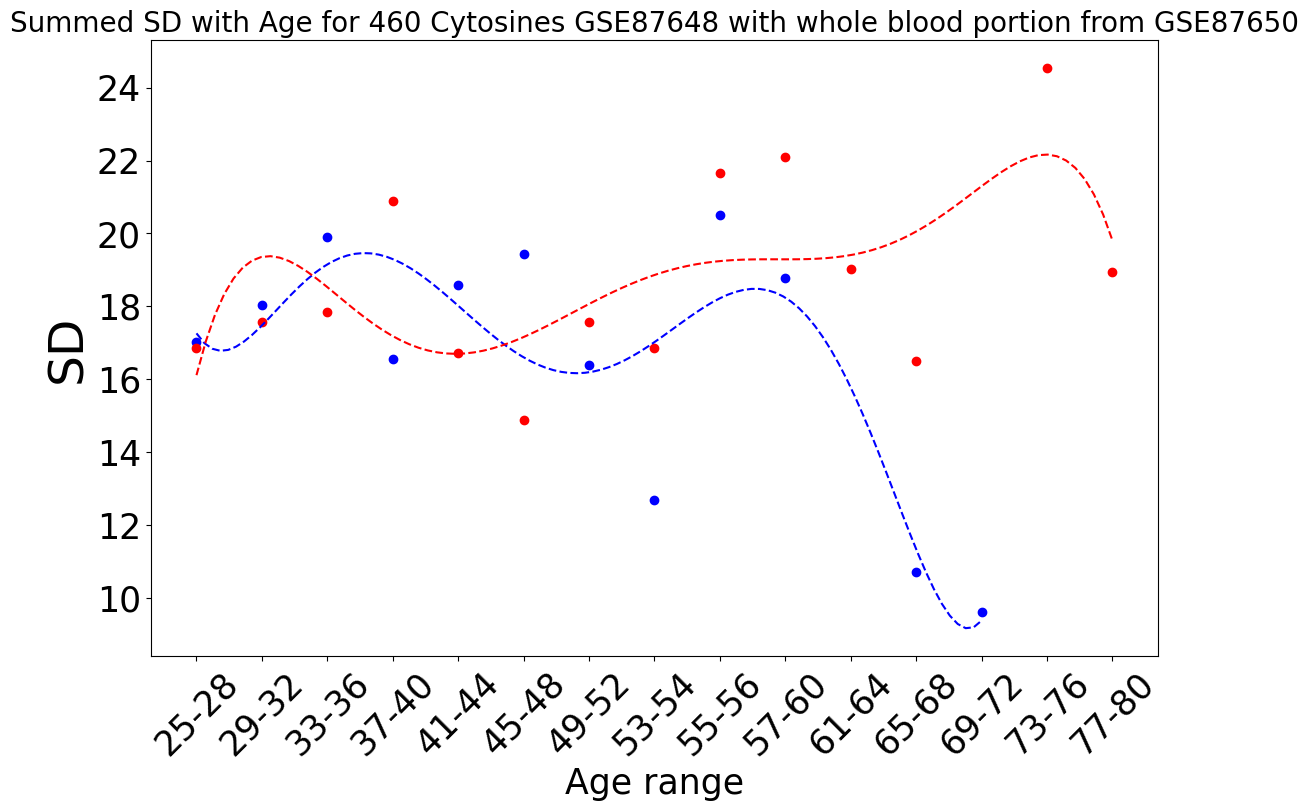

In [172]:

ibs_nor460_sum_concat = ibs_nor_concated.groupby('age_group').std().sum(axis=1).to_frame()
ibs_nor460_sum_concat[0] = ibs_nor460_sum_concat[0].replace(0, np.nan)

ibs_dis460_sum_concat = ibs_dis_concated.groupby('age_group').std().sum(axis=1).to_frame()
ibs_dis460_sum_concat[0] = ibs_dis460_sum_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = ibs_dis460_sum_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, ibs_nor460_sum_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, ibs_nor460_sum_concat[0], color = 'b')


plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, ibs_dis460_sum_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, ibs_dis460_sum_concat[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
# plt.locator_params(axis='y', nbins=5)

plt.show()


In [87]:
#ibs_gse87648.to_pickle('/Users/xiaoyuemei/Downloads/ibs_gse87648.pkl')

In [10]:
down = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Down_syndrome.pkl', "rb"))
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')
ms = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/MS.pickle', "rb"))
parknor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/norm_park.pickle', "rb"))
park = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/dis_park.pickle', "rb"))
werner = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Werner_Syndrome.pickle', "rb")) 


In [11]:
#hannum = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/hannum.pickle', "rb"))
hiv = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/HIV_male.pkl', "rb"))


In [12]:
down_nor = down.iloc[26:, :]
down_nor['dataset'] = 'down_nor'

down_dis = down.iloc[:26, :]
down_dis['dataset'] = 'down_dis'

anor = anor.rename(columns={'age':'Age'})
anor['dataset'] = 'anor'

arth = arth.rename(columns={'age':'Age'})
arth['dataset'] = 'arth'

park= park.rename(columns={'age':'Age'})
park['dataset'] = 'park'

parknor= parknor.rename(columns={'age':'Age'})
parknor['dataset'] = 'parknor'

werner = werner.rename(columns={'age':'Age'})
mask = ~werner.index.isin([('GSE100825', 'GSM2694066'), ('GSE100825', 'GSM2694068'),('GSE100825', 'GSM2694070')])
Werner_Syndrome_h = werner.loc[mask]
Werner_Syndrome_h['dataset'] = 'Werner_Syndrome_h'

mask = ~werner.index.isin([('GSE100825', 'GSM2694067'), ('GSE100825', 'GSM2694069'),('GSE100825', 'GSM2694071')])
Werner_Syndrome_d = werner.loc[mask]
Werner_Syndrome_d['dataset'] = 'Werner_Syndrome_d'

ms = ms.rename(columns={'age':'Age'})
ms['Age'] = ms['Age'].astype(str).astype(int)
ms_nor = ms[ms['status']=='Healthy control']
ms_nor['dataset'] = 'ms_nor'

ms_dis = ms[ms['status']!='Healthy control']
ms_dis['dataset'] = 'ms_dis'

ibs_age = ibs_age.set_index('Unnamed: 0')
ibs['Age'] = ibs_age['Age']
ibs['status'] = ibs_age['Disease State']
ibs_nor_240 = ibs[ibs['status']=='HC']
ibs_nor_240['dataset'] = 'ibs_nor'

ibs_dis_240 = ibs[ibs['status']!='HC']
ibs_dis_240['dataset'] = 'ibs_dis'


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_84832/2138708174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_nor['dataset'] = 'down_nor'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_84832/2138708174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_dis['dataset'] = 'down_dis'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_84832/2138708174.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [35]:
#combine_healthy_common = pd.concat([parknor, anor, ms_nor, ibs_nor_240, down_nor, Werner_Syndrome_h], ignore_index=True, sort=False).dropna(axis=1)
# combine_dis_nohiv = pd.concat([park, arth, ms_dis, ibs_dis_240, down_dis, Werner_Syndrome_d], ignore_index=True, sort=False)

# #ibs edition
# combine_healthy_noibs = pd.concat([parknor, anor, ms_nor, down_nor, Werner_Syndrome_h], ignore_index=True, sort=False)
combine_dis_noibs_nohiv = pd.concat([park, arth, ms_dis, down_dis, Werner_Syndrome_d], ignore_index=True, sort=False)


In [22]:
combine_dis_havehiv_ori =  pd.concat([park, arth, ms_dis, ibs_dis_240, down_dis, Werner_Syndrome_d, hiv], ignore_index=True, sort=False)


In [21]:
combine_dis_havehiv_ori_ibs =  pd.concat([park, arth, ms_dis, down_dis, Werner_Syndrome_d, hiv], ignore_index=True, sort=False)
combine_dis_havehiv_ori_ibs = combine_dis_havehiv_ori_ibs[combine_dis_havehiv_ori_ibs['Age']>24]
combine_dis_havehiv_ori_ibs['age_group'] = pd.cut(
    combine_dis_havehiv_ori_ibs['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

combine_dis_havehiv_newibs = pd.concat([combine_dis_havehiv_ori_ibs[cpgs460], ibs_dis460], ignore_index=True)


In [23]:
combine_dis_havehiv_ori = combine_dis_havehiv_ori[combine_dis_havehiv_ori['Age']>24]
combine_dis_havehiv_ori['age_group'] = pd.cut(
    combine_dis_havehiv_ori['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])


In [32]:

#combine_dis_nohiv = combine_dis_nohiv.dropna(axis=1)

In [36]:
# combine_healthy_common = combine_healthy_common[combine_healthy_common['Age']>24]
# combine_healthy_common['age_group'] = pd.cut(
#     combine_healthy_common['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])
# combine_dis_nohiv = combine_dis_nohiv[combine_dis_nohiv['Age']>24]
# combine_dis_nohiv['age_group'] = pd.cut(
#     combine_dis_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])

# combine_healthy_noibs = combine_healthy_noibs[combine_healthy_noibs['Age']>24]
# combine_healthy_noibs['age_group'] = pd.cut(
#     combine_healthy_noibs['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])

combine_dis_noibs_nohiv = combine_dis_noibs_nohiv[combine_dis_noibs_nohiv['Age']>24]
combine_dis_noibs_nohiv['age_group'] = pd.cut(
    combine_dis_noibs_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

In [150]:
# combine_healthy_common_newibs = pd.concat([combine_healthy_common, ibs_nor_concated], ignore_index=True).dropna(axis=1)
# combine_dis_nohiv_newibs = pd.concat([combine_dis_nohiv, ibs_dis_concated], ignore_index=True).dropna(axis=1)

combine_healthy_common_newibs = pd.concat([combine_healthy_noibs, ibs_nor460], ignore_index=True).dropna(axis=1)
combine_dis_nohiv_newibs = pd.concat([combine_dis_noibs_nohiv, ibs_dis460], ignore_index=True)


In [151]:
combine_healthy_common_newibs

,cg05639522,cg06649280,cg07367222,cg08137948,cg13446070,cg23603891,cg26837773,cg09606941,cg10859133,cg17942639,...,cg26650480,cg08451325,cg01021975,cg01441988,cg03873518,cg09322432,cg14543179,cg22042992,cg23066564,age_group
0,0.484404,0.388337,0.920565,0.254334,0.869727,0.093731,0.428024,0.014111,0.216348,0.008266,...,0.668989,0.798511,0.831107,0.827468,0.944232,0.808524,0.606486,0.740702,0.836661,45-48
1,0.434759,0.513451,0.940798,0.275639,0.850771,0.144119,0.616111,0.015018,0.213652,0.012502,...,0.674551,0.845646,0.815894,0.820869,0.932019,0.853894,0.592342,0.765402,0.835077,65-68
2,0.558335,0.453735,0.939185,0.204672,0.893114,0.129196,0.650037,0.010927,0.203519,0.020876,...,0.695867,0.848494,0.820358,0.821003,0.946293,0.853096,0.627223,0.76846,0.793474,41-44
3,0.505343,0.540826,0.942468,0.413155,0.863136,0.119017,0.499014,0.020892,0.193755,0.01332,...,0.659463,0.849024,0.779039,0.832846,0.920474,0.811145,0.641754,0.707083,0.8227,41-44
4,0.478293,0.50094,0.913228,0.18193,0.863424,0.131129,0.446378,0.02989,0.273293,0.017803,...,0.713653,0.854078,0.827958,0.886203,0.90556,0.88634,0.582927,0.781145,0.865508,61-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.576981,0.546366,0.906676,0.297597,0.864992,0.178947,0.489714,0.038317,0.232797,0.03476,...,0.74925,0.876826,0.846863,0.884694,0.922004,0.839706,0.671532,0.74796,0.878346,29-32
750,0.610371,0.511251,0.904187,0.289216,0.869189,0.175869,0.536575,0.033516,0.180902,0.042681,...,0.763483,0.887277,0.85335,0.878041,0.922558,0.840111,0.713451,0.813213,0.88636,55-56
751,0.487661,0.49386,0.916184,0.224289,0.861948,0.16775,0.555792,0.036801,0.211199,0.04004,...,0.733001,0.898469,0.79869,0.853072,0.893297,0.853629,0.638209,0.764517,0.870389,25-28
752,0.442716,0.488187,0.89981,0.390938,0.866677,0.167938,0.428316,0.038924,0.184974,0.044197,...,0.751984,0.879553,0.85927,0.890675,0.909569,0.875911,0.709129,0.781279,0.886758,25-28


In [153]:
combine_dis_nohiv_newibs[cpgs460]

,cg05639522,cg06649280,cg07367222,cg08137948,cg13446070,cg23603891,cg26837773,cg09606941,cg10859133,cg17942639,...,cg26650480,cg08451325,cg01021975,cg01441988,cg03873518,cg09322432,cg14543179,cg22042992,cg23066564,age_group
0,0.602912,0.495184,0.921736,0.177931,0.851614,0.11547,0.46692,0.021873,0.213942,0.014688,...,0.65452,0.826924,0.822674,0.864582,0.953343,0.825955,0.664379,0.764096,0.819869,65-68
1,0.478883,0.482839,0.908287,0.218897,0.833478,0.137084,0.596667,0.021424,0.237002,0.093597,...,0.652009,0.784225,0.808746,0.844515,0.896518,0.823031,0.724369,0.709391,0.81199,73-76
2,0.519227,0.677436,0.931995,0.226263,0.886257,0.147035,0.682284,0.020031,0.183892,0.014243,...,0.693178,0.84449,0.778357,0.848114,0.903694,0.827218,0.729274,0.736309,0.825231,69-72
3,0.500695,0.410841,0.884586,0.205934,0.855738,0.153626,0.438181,0.029029,0.241651,0.018707,...,0.67246,0.813802,0.837271,0.856936,0.942334,0.875186,0.591224,0.785004,0.830451,73-76
4,0.435307,0.55461,0.925583,0.220129,0.838659,0.122449,0.33573,0.020078,0.186616,0.01819,...,0.69873,0.839373,0.81467,0.848552,0.943783,0.827489,0.539161,0.745647,0.815395,49-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.66283,0.449697,0.91349,0.188897,0.88664,0.176071,0.564076,0.040674,0.188421,0.04423,...,0.76951,0.8938,0.856525,0.856107,0.923666,0.839219,0.733136,0.81023,0.884918,37-40
802,0.615471,0.538137,0.911811,0.30082,0.88115,0.159598,0.451342,0.033563,0.206786,0.047026,...,0.76691,0.886366,0.845935,0.872547,0.917509,0.86167,0.772241,0.797793,0.877479,25-28
803,0.488977,0.509363,0.932423,0.263845,0.871165,0.163854,0.445345,0.035924,0.220484,0.038521,...,0.720077,0.859237,0.820295,0.844091,0.922074,0.846154,0.621127,0.772306,0.845012,25-28
804,0.598784,0.411621,0.903649,0.262017,0.863952,0.162543,0.424412,0.03928,0.210212,0.041538,...,0.768144,0.901213,0.850142,0.877317,0.909553,0.85818,0.625787,0.79803,0.849042,29-32


In [154]:
# healthy_5vg_newibs = combine_healthy_common_newibs[cpg5].groupby('age_group').std().sum(axis=1).to_frame()
# dis_5vg_newibs = combine_dis_havehiv_newibs[cpg5].groupby('age_group').std().sum(axis=1).to_frame()

healthy_460_newibs = combine_healthy_common_newibs[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()
dis_460_newibs = combine_dis_nohiv_newibs[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()


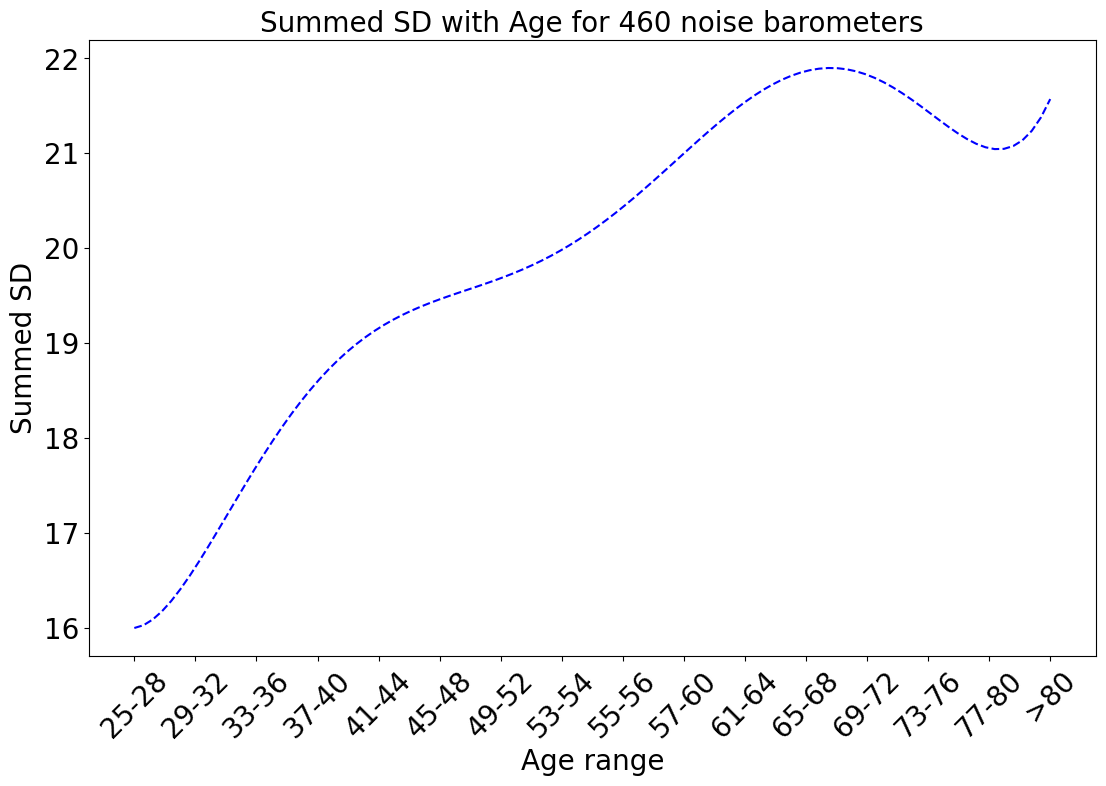

In [159]:
x = np.array(np.arange(16))
my_xticks = healthy_460_newibs.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
popt, pcov = curve_fit(poly_6, x, healthy_460_newibs[0])
x_range = np.linspace(0, 15, 100)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.title("Summed SD with Age for 460 noise barometers", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

In [39]:
combine_dis_nohiv_newibs

,cg05639522,cg06649280,cg07367222,cg08137948,cg13446070,cg23603891,cg26837773,cg09606941,cg10859133,cg17942639,...,cg26650480,cg08451325,cg01021975,cg01441988,cg03873518,cg09322432,cg14543179,cg22042992,cg23066564,age_group
0,0.602912,0.495184,0.921736,0.177931,0.851614,0.11547,0.46692,0.021873,0.213942,0.014688,...,0.65452,0.826924,0.822674,0.864582,0.953343,0.825955,0.664379,0.764096,0.819869,65-68
1,0.478883,0.482839,0.908287,0.218897,0.833478,0.137084,0.596667,0.021424,0.237002,0.093597,...,0.652009,0.784225,0.808746,0.844515,0.896518,0.823031,0.724369,0.709391,0.81199,73-76
2,0.519227,0.677436,0.931995,0.226263,0.886257,0.147035,0.682284,0.020031,0.183892,0.014243,...,0.693178,0.84449,0.778357,0.848114,0.903694,0.827218,0.729274,0.736309,0.825231,69-72
3,0.500695,0.410841,0.884586,0.205934,0.855738,0.153626,0.438181,0.029029,0.241651,0.018707,...,0.67246,0.813802,0.837271,0.856936,0.942334,0.875186,0.591224,0.785004,0.830451,73-76
4,0.435307,0.55461,0.925583,0.220129,0.838659,0.122449,0.33573,0.020078,0.186616,0.01819,...,0.69873,0.839373,0.81467,0.848552,0.943783,0.827489,0.539161,0.745647,0.815395,49-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.66283,0.449697,0.91349,0.188897,0.88664,0.176071,0.564076,0.040674,0.188421,0.04423,...,0.76951,0.8938,0.856525,0.856107,0.923666,0.839219,0.733136,0.81023,0.884918,37-40
802,0.615471,0.538137,0.911811,0.30082,0.88115,0.159598,0.451342,0.033563,0.206786,0.047026,...,0.76691,0.886366,0.845935,0.872547,0.917509,0.86167,0.772241,0.797793,0.877479,25-28
803,0.488977,0.509363,0.932423,0.263845,0.871165,0.163854,0.445345,0.035924,0.220484,0.038521,...,0.720077,0.859237,0.820295,0.844091,0.922074,0.846154,0.621127,0.772306,0.845012,25-28
804,0.598784,0.411621,0.903649,0.262017,0.863952,0.162543,0.424412,0.03928,0.210212,0.041538,...,0.768144,0.901213,0.850142,0.877317,0.909553,0.85818,0.625787,0.79803,0.849042,29-32


In [32]:
combine_dis_havehiv_newibs

,cg05639522,cg06649280,cg07367222,cg08137948,cg13446070,cg23603891,cg26837773,cg09606941,cg10859133,cg17942639,...,cg26650480,cg08451325,cg01021975,cg01441988,cg03873518,cg09322432,cg14543179,cg22042992,cg23066564,age_group
0,0.602912,0.495184,0.921736,0.177931,0.851614,0.11547,0.46692,0.021873,0.213942,0.014688,...,0.65452,0.826924,0.822674,0.864582,0.953343,0.825955,0.664379,0.764096,0.819869,65-68
1,0.478883,0.482839,0.908287,0.218897,0.833478,0.137084,0.596667,0.021424,0.237002,0.093597,...,0.652009,0.784225,0.808746,0.844515,0.896518,0.823031,0.724369,0.709391,0.81199,73-76
2,0.519227,0.677436,0.931995,0.226263,0.886257,0.147035,0.682284,0.020031,0.183892,0.014243,...,0.693178,0.84449,0.778357,0.848114,0.903694,0.827218,0.729274,0.736309,0.825231,69-72
3,0.500695,0.410841,0.884586,0.205934,0.855738,0.153626,0.438181,0.029029,0.241651,0.018707,...,0.67246,0.813802,0.837271,0.856936,0.942334,0.875186,0.591224,0.785004,0.830451,73-76
4,0.435307,0.55461,0.925583,0.220129,0.838659,0.122449,0.33573,0.020078,0.186616,0.01819,...,0.69873,0.839373,0.81467,0.848552,0.943783,0.827489,0.539161,0.745647,0.815395,49-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.66283,0.449697,0.91349,0.188897,0.88664,0.176071,0.564076,0.040674,0.188421,0.04423,...,0.76951,0.8938,0.856525,0.856107,0.923666,0.839219,0.733136,0.81023,0.884918,37-40
911,0.615471,0.538137,0.911811,0.30082,0.88115,0.159598,0.451342,0.033563,0.206786,0.047026,...,0.76691,0.886366,0.845935,0.872547,0.917509,0.86167,0.772241,0.797793,0.877479,25-28
912,0.488977,0.509363,0.932423,0.263845,0.871165,0.163854,0.445345,0.035924,0.220484,0.038521,...,0.720077,0.859237,0.820295,0.844091,0.922074,0.846154,0.621127,0.772306,0.845012,25-28
913,0.598784,0.411621,0.903649,0.262017,0.863952,0.162543,0.424412,0.03928,0.210212,0.041538,...,0.768144,0.901213,0.850142,0.877317,0.909553,0.85818,0.625787,0.79803,0.849042,29-32


In [104]:
dis_5vg_newibs

,0
age_group,
25-28,0.077137
29-32,0.074877
33-36,0.087251
37-40,0.091998
41-44,0.081336
45-48,0.089004
49-52,0.095807
53-54,0.095580
55-56,0.082335


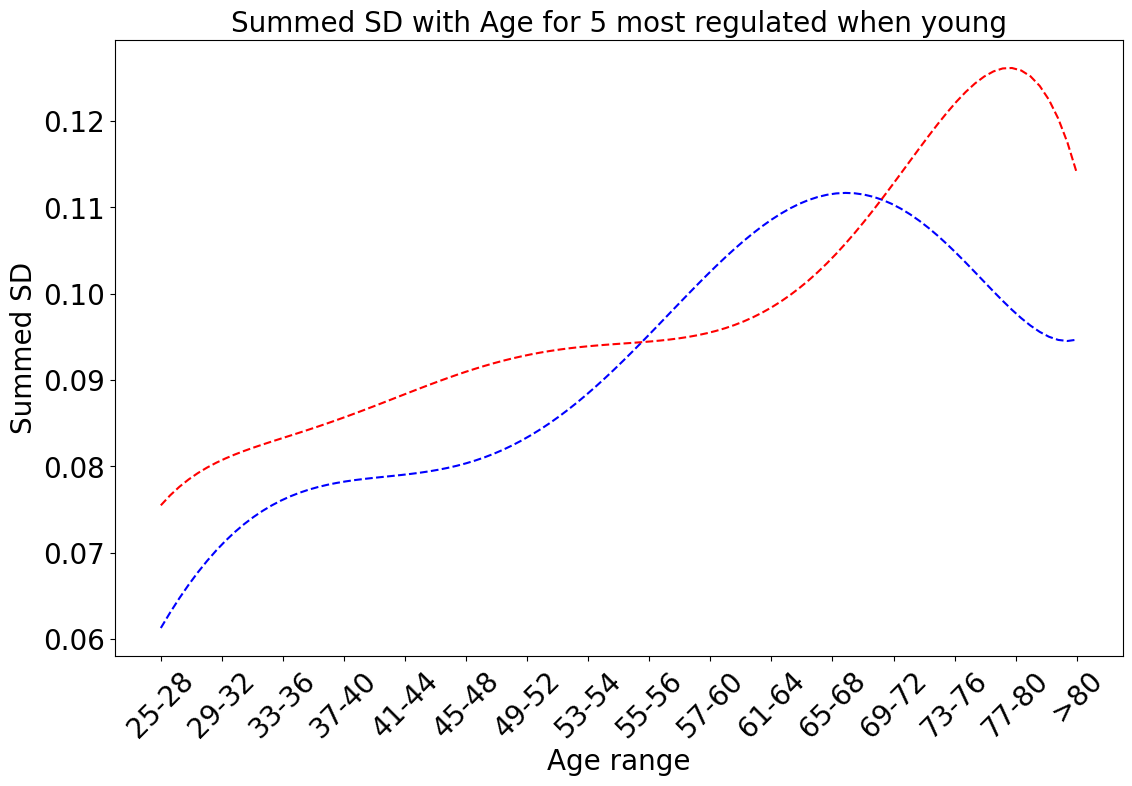

In [105]:
x = np.array(np.arange(16))
my_xticks = healthy_5vg_newibs.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, healthy_5vg_newibs[0])
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, dis_5vg_newibs[0])

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 5 most regulated when young", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

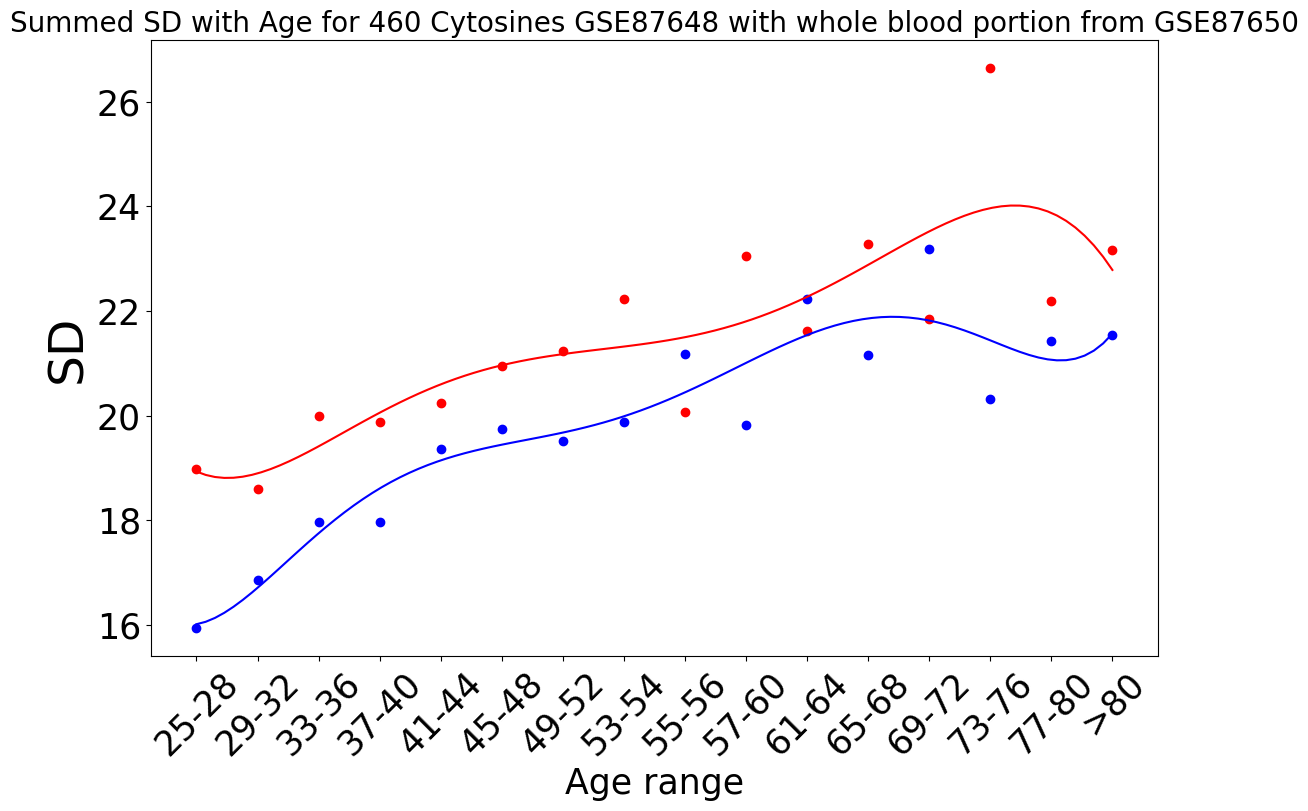

In [30]:


combine_healthy_common_newibs_concat = combine_healthy_common_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_healthy_common_newibs_concat[0] = combine_healthy_common_newibs_concat[0].replace(0, np.nan)

combine_dis_nohiv_newibs_concat = combine_dis_havehiv_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_nohiv_newibs_concat[0] = combine_dis_nohiv_newibs_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_newibs_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_newibs_concat[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_nohiv_newibs_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_nohiv_newibs_concat[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

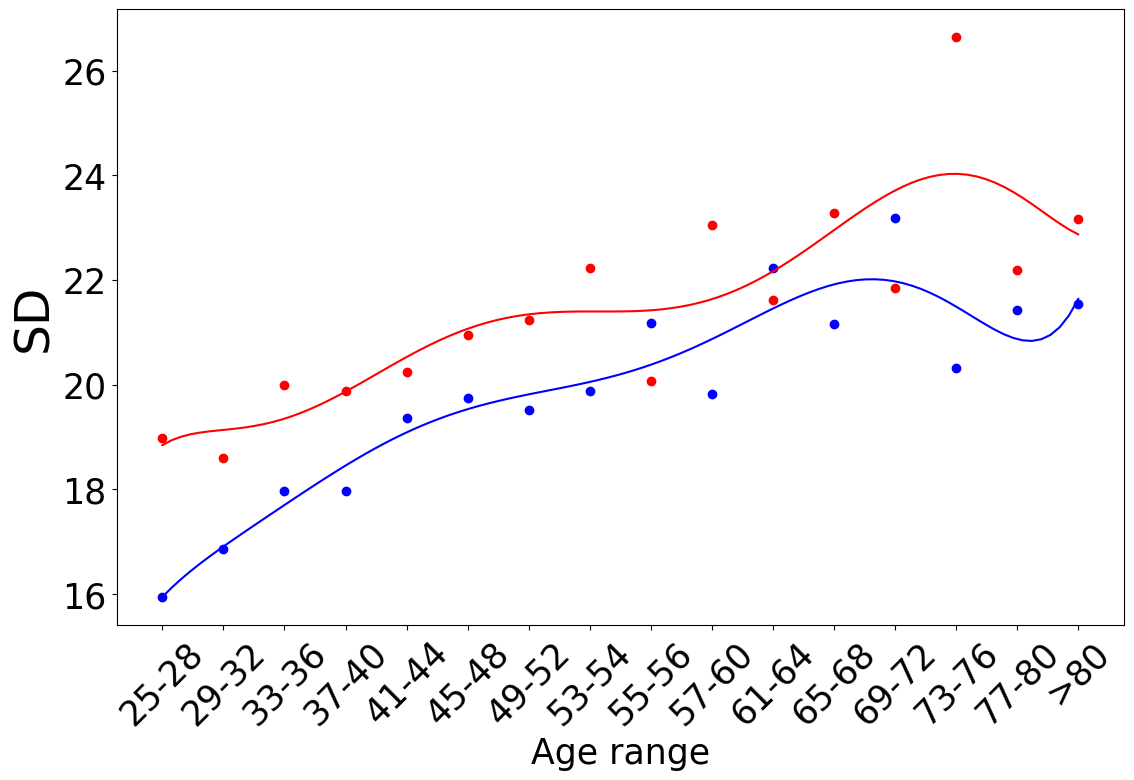

In [34]:


combine_healthy_common_newibs_concat = combine_healthy_common_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_healthy_common_newibs_concat[0] = combine_healthy_common_newibs_concat[0].replace(0, np.nan)

combine_dis_nohiv_newibs_concat = combine_dis_havehiv_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_nohiv_newibs_concat[0] = combine_dis_nohiv_newibs_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_newibs_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_7, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_newibs_concat[0], color = 'b')

plt.plot(x_range, poly_7(x_range, *popt),color = 'b', linestyle='-')
#plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_nohiv_newibs_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_7, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_nohiv_newibs_concat[0], color = 'r')

plt.plot(x_range, poly_7(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

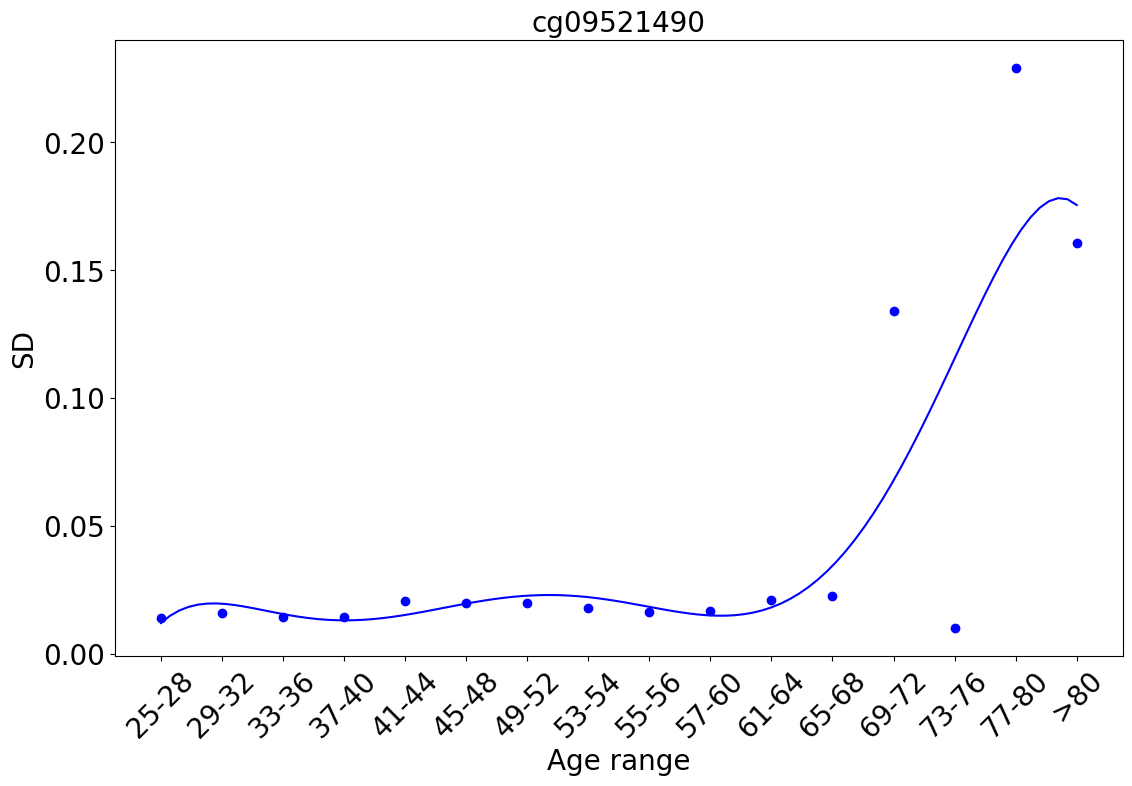

In [90]:
combine_healthy_cg09521490 = combine_healthy_common_newibs.groupby('age_group').std()['cg09521490'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg09521490['cg09521490'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg09521490['cg09521490'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg09521490", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

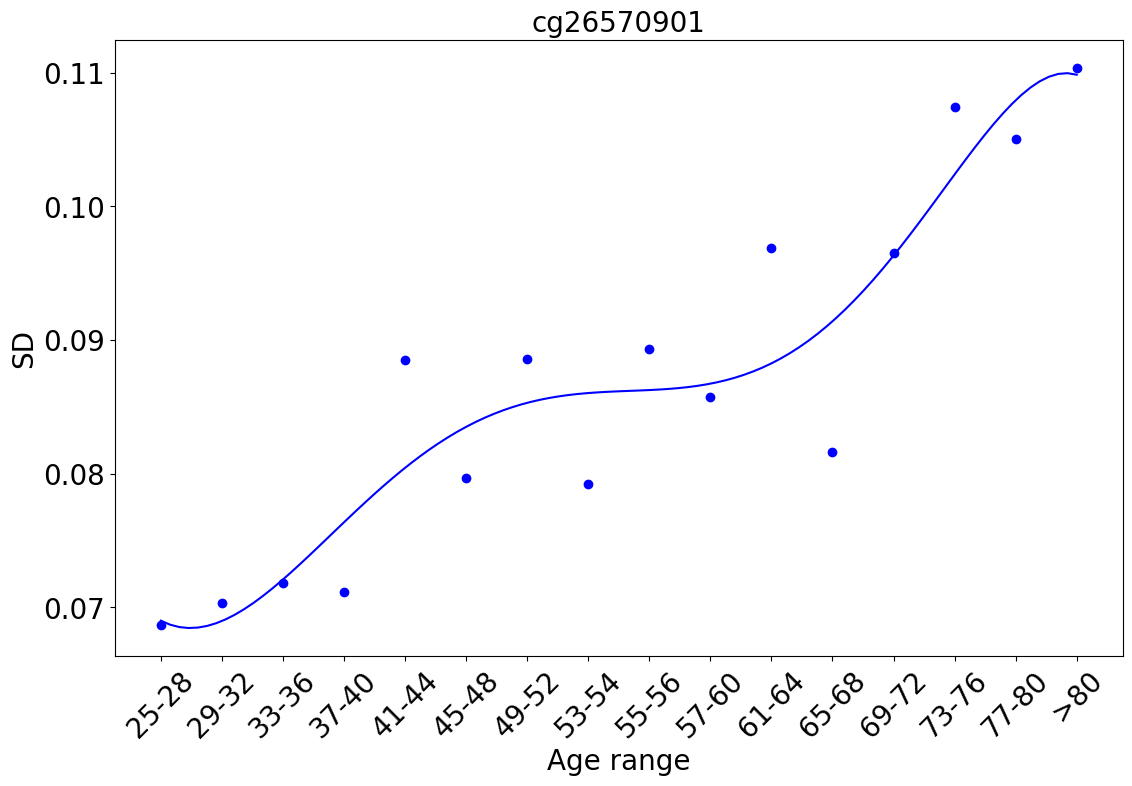

In [91]:
combine_healthy_cg26570901 = combine_healthy_common_newibs.groupby('age_group').std()['cg26570901'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg26570901['cg26570901'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg26570901['cg26570901'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg26570901", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

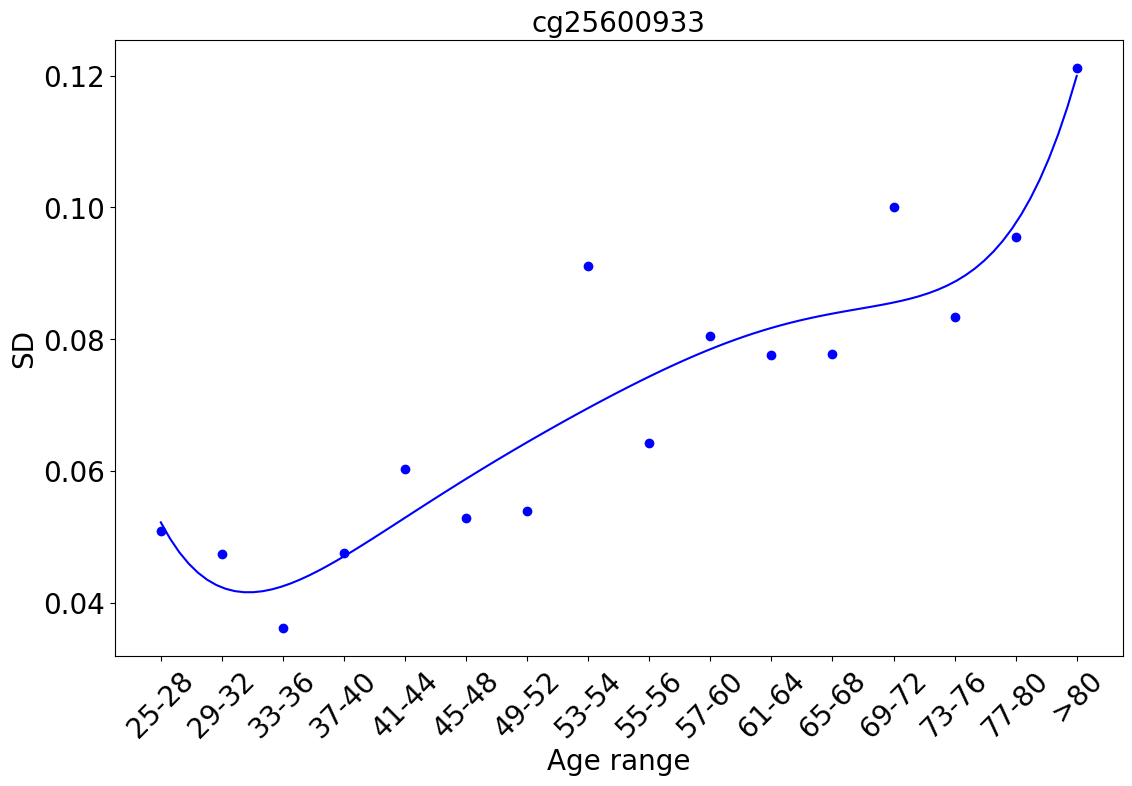

In [92]:
combine_healthy_cg25600933 = combine_healthy_common_newibs.groupby('age_group').std()['cg25600933'].to_frame()
x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.scatter(x, combine_healthy_cg25600933['cg25600933'],color = 'b')
popt, pcov = curve_fit(poly_6, x, combine_healthy_cg25600933['cg25600933'])
x_range = np.linspace(0, 15, 100)
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("cg25600933", fontsize=20)

plt.xlabel('Age range', fontsize=20)
plt.ylabel('SD', fontsize=20)

plt.show()

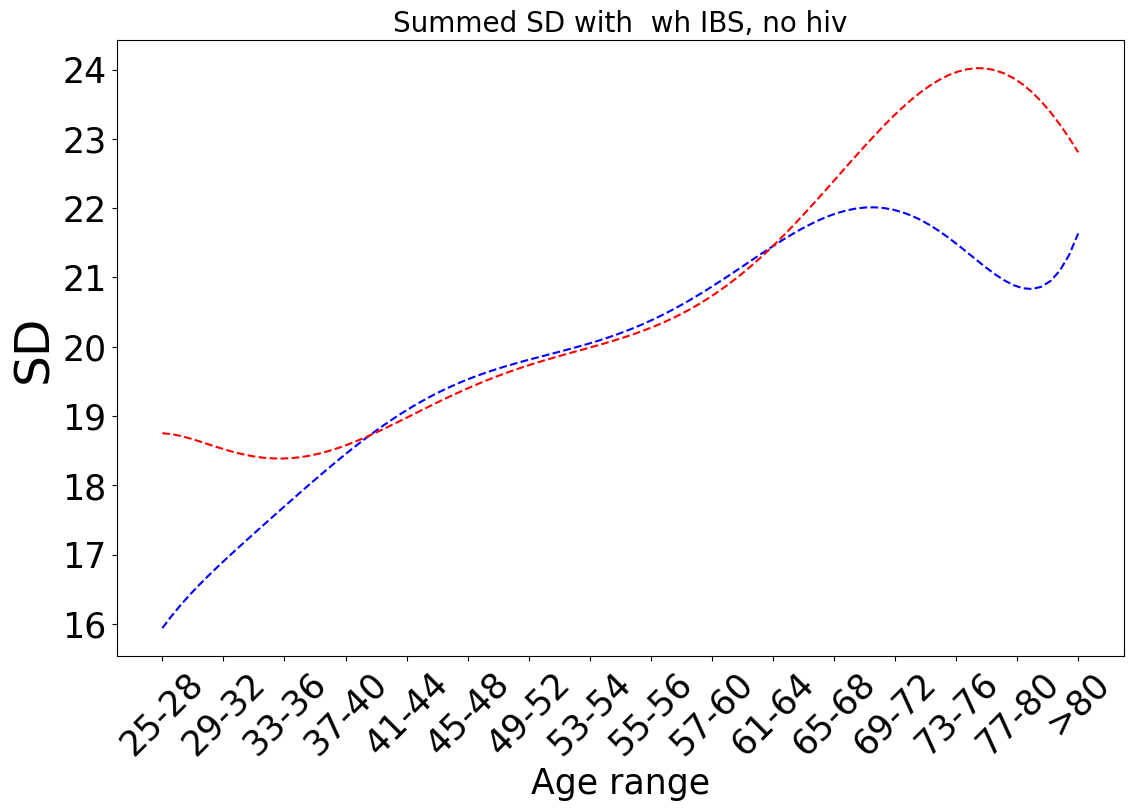

In [83]:
combine_healthy_common_newibs_concat = combine_healthy_common_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_healthy_common_newibs_concat[0] = combine_healthy_common_newibs_concat[0].replace(0, np.nan)

combine_dis_nohiv_newibs_concat = combine_dis_nohiv_newibs[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_nohiv_newibs_concat[0] = combine_dis_nohiv_newibs_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_newibs_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_7, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)

plt.plot(x_range, poly_7(x_range, *popt),color = 'b', linestyle='--')
plt.title("Summed SD with  wh IBS, no hiv", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_nohiv_newibs_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_7, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.plot(x_range, poly_7(x_range, *popt_d),color = 'r', linestyle='--')
# plt.locator_params(axis='y', nbins=5)

plt.show()

In [ ]:
#combine_dis_sum_ori = combine_dis_nohiv[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_sum_ori_hiv = combine_dis_havehiv_ori[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()

In [47]:
combine_healthy_common_sum_ori = combine_healthy_common[cpgs460].groupby('age_group').std().sum(axis=1).to_frame()


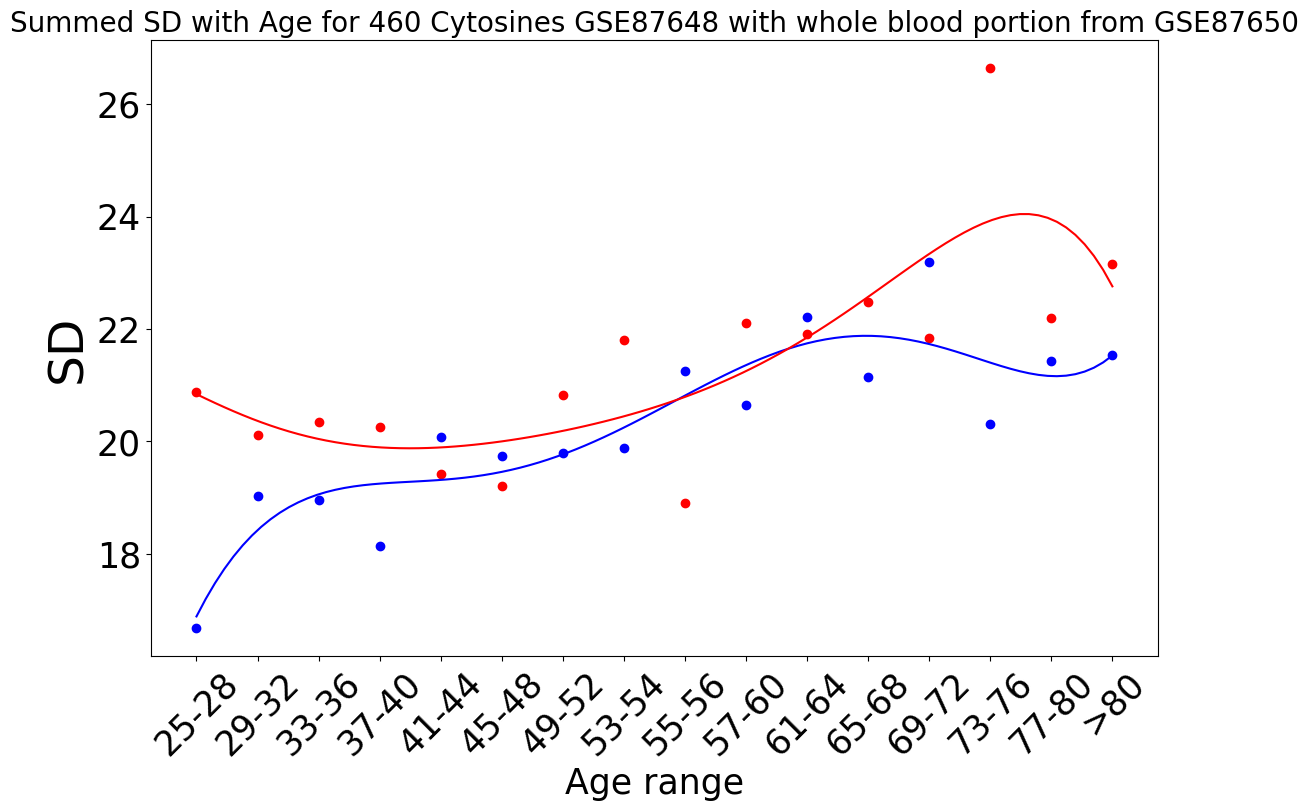

In [49]:
x = np.array(np.arange(16))
my_xticks = combine_healthy_common_sum_ori.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_sum_ori[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_sum_ori[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_sum_ori[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_sum_ori[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

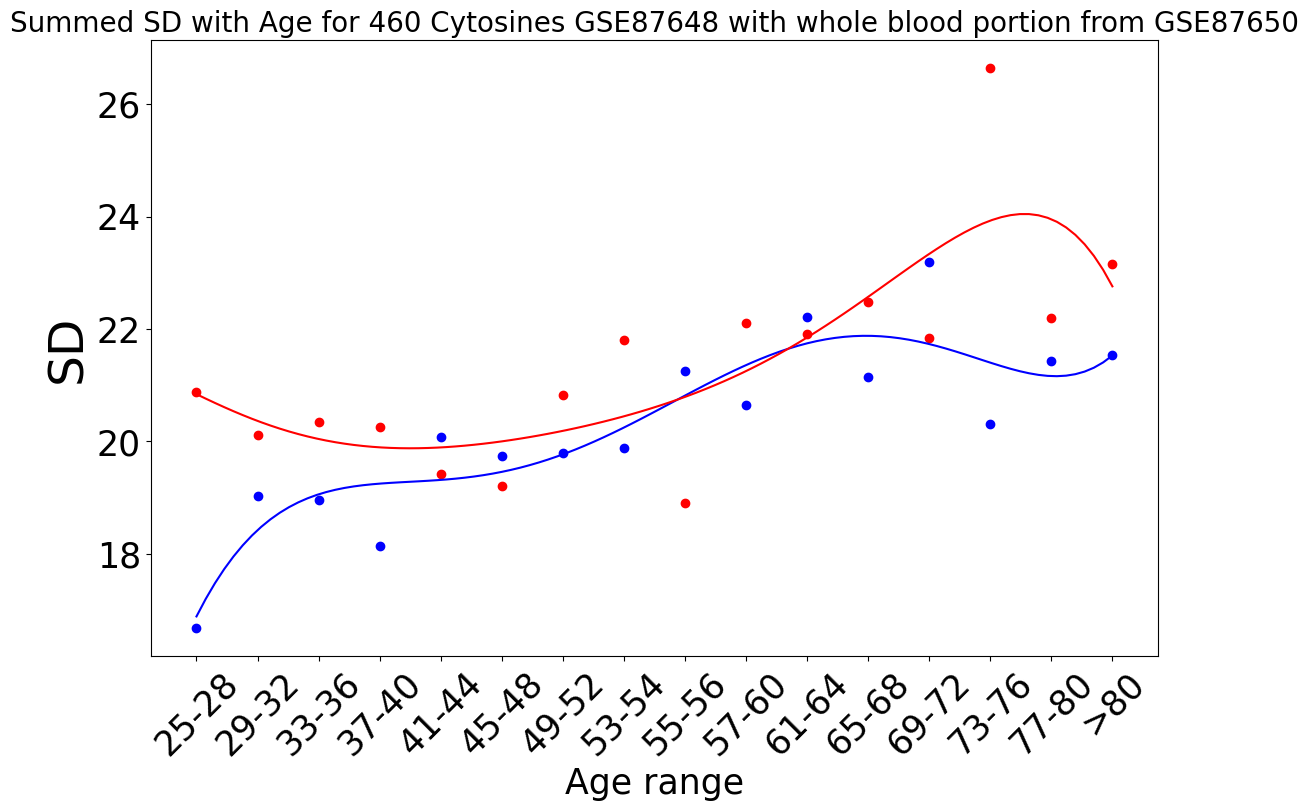

In [49]:
x = np.array(np.arange(16))
my_xticks = combine_healthy_common_sum_ori.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_sum_ori[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_sum_ori[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_sum_ori_hiv[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_sum_ori_hiv[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

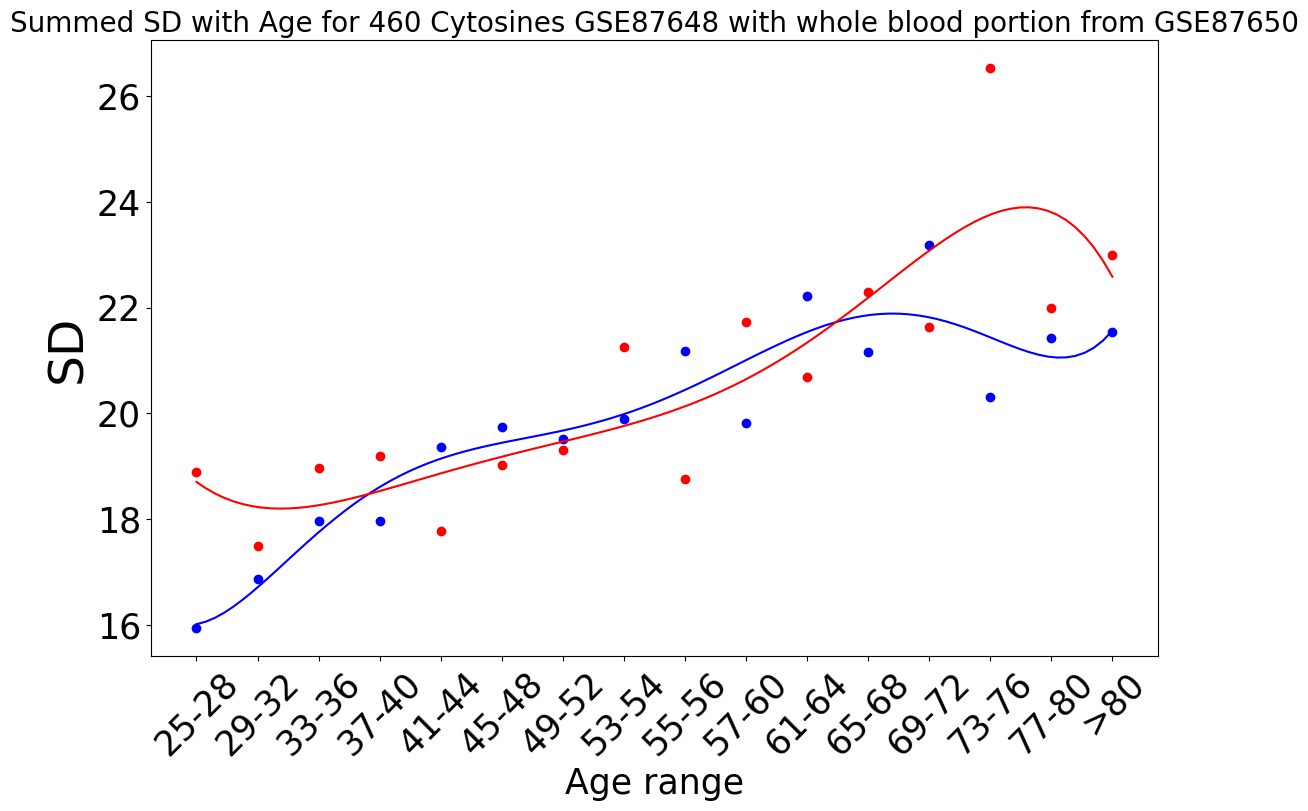

In [196]:
combine_healthy_common_newibs_concat = combine_healthy_common_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_healthy_common_newibs_concat[0] = combine_healthy_common_newibs_concat[0].replace(0, np.nan)

combine_dis_nohiv_newibs_concat = combine_dis_nohiv_newibs.groupby('age_group').std().sum(axis=1).to_frame()
combine_dis_nohiv_newibs_concat[0] = combine_dis_nohiv_newibs_concat[0].replace(0, np.nan)

x = np.array(np.arange(16))
my_xticks = combine_healthy_common_newibs_concat.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)


zip_agegroup_SD = list(zip(x, combine_healthy_common_newibs_concat[0]))
first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
plt.scatter(x, combine_healthy_common_newibs_concat[0], color = 'b')

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='-')
plt.title("Summed SD with Age for 460 Cytosines GSE87648 with whole blood portion from GSE87650", fontsize=20)
plt.xlabel('Age range', fontsize=25)
plt.ylabel('SD', fontsize=35)

zip_agegroup_SD_d = list(zip(x, combine_dis_nohiv_newibs_concat[0]))
first_numbers_d = [item[0] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
second_numbers_d = [item[1] for item in zip_agegroup_SD_d if not math.isnan(item[1])]
popt_d, pcov = curve_fit(poly_6, first_numbers_d, second_numbers_d)
x_range = np.linspace(min(first_numbers_d), max(first_numbers_d), 100)

plt.scatter(x, combine_dis_nohiv_newibs_concat[0], color = 'r')

plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='-')
# plt.locator_params(axis='y', nbins=5)

plt.show()

In [6]:
combine_healthy_3df = pd.concat([parknor, anor, ms_nor]).dropna(axis=1)


In [1]:
combine_healthy_3df = combine_healthy_3df[combine_healthy_3df['Age']>24]
combine_healthy_3df['age_group'] = pd.cut(
    combine_healthy_3df['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_healthy_3df_5 = combine_healthy_3df[cpg5]
combine_healthy_3df_5['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_293 = combine_healthy_3df[CpGs293]
combine_healthy_3df_293['age_group'] = combine_healthy_3df['age_group']
combine_healthy_3df_293['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_460= combine_healthy_3df[cpgs460]
combine_healthy_3df_460['dataset'] = combine_healthy_3df['dataset']
combine_healthy_3df_143k = combine_healthy_3df[common_h_fsig.columns.to_list()]
combine_healthy_3df_143k['dataset'] = combine_healthy_3df['dataset']


In [85]:
combine_healthy_common[combine_healthy_common.columns.intersection(CpGs293)].groupby('age_group').std().sum(axis=1).to_frame()


,0
age_group,
25-28,10.021086
29-32,11.794869
33-36,11.999518
37-40,11.589913
41-44,12.923695
45-48,13.004065
49-52,13.023018
53-54,13.154373
55-56,13.988239


In [508]:
test_ADM_lst_ab = []
for i in combine_healthy_3df_143k.age_group.unique():
    test = combine_healthy_common[combine_healthy_common['age_group'] == i][combine_healthy_common.columns.intersection(combine_healthy_3df_5.columns)].drop(columns='age_group').drop(columns='dataset')
    test_ADM_ab = abs(test- test.mean()).sum(axis=1).mean()
    test_ADM_lst_ab.append(test_ADM_ab)
    
test_ADM_lst_d_ab = []
for i in combine_healthy_3df_143k.age_group.unique():
    test_d = combine_dis_nohiv[combine_dis_nohiv['age_group'] == i][combine_dis_nohiv.columns.intersection(combine_healthy_3df_5.columns)].drop(columns='age_group').drop(columns='dataset')
    test_ADM_d_ab = abs(test_d- test_d.mean()).mean().mean()
    test_ADM_lst_d_ab.append(test_ADM_d_ab)



In [25]:
fig5b_460 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '460cyt')
fig5b_460 = fig5b_460.replace(0, np.nan).set_index('Age_group')
fig5b_143k = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '143kcyt')
fig5b_143k = fig5b_143k.replace(0, np.nan).set_index('Age_group')
fig5b_5 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '5cyt')
fig5b_5 = fig5b_5.replace(0, np.nan).set_index('Age_group')
fig5b_293 = pd.read_excel(r'/Users/xiaoyuemei/Downloads/Supplementary_fig_3df.xlsx', '293cyt')
fig5b_293 = fig5b_293.replace(0, np.nan).set_index('Age_group')


In [24]:
# pred values plugged in
# parkinson's range 
# popt, pcov = curve_fit(poly_6, np.array(np.arange(4, 16)), fig143k['Parkinson'][4:])
# poly_6(np.array(np.arange(4, 16)), *popt)

# normal's range
popt, pcov = curve_fit(poly_6, np.array(np.arange(16)), fig5b_5['Median'][:16])
poly_6(np.array(np.arange(16)), *popt)


array([0.0590305 , 0.06604604, 0.07109842, 0.07419545, 0.07567563,
       0.07612194, 0.07626353, 0.07686511, 0.07860413, 0.08193576,
       0.08694568, 0.09319059, 0.09952658, 0.10392519, 0.10327737,
       0.09318509])

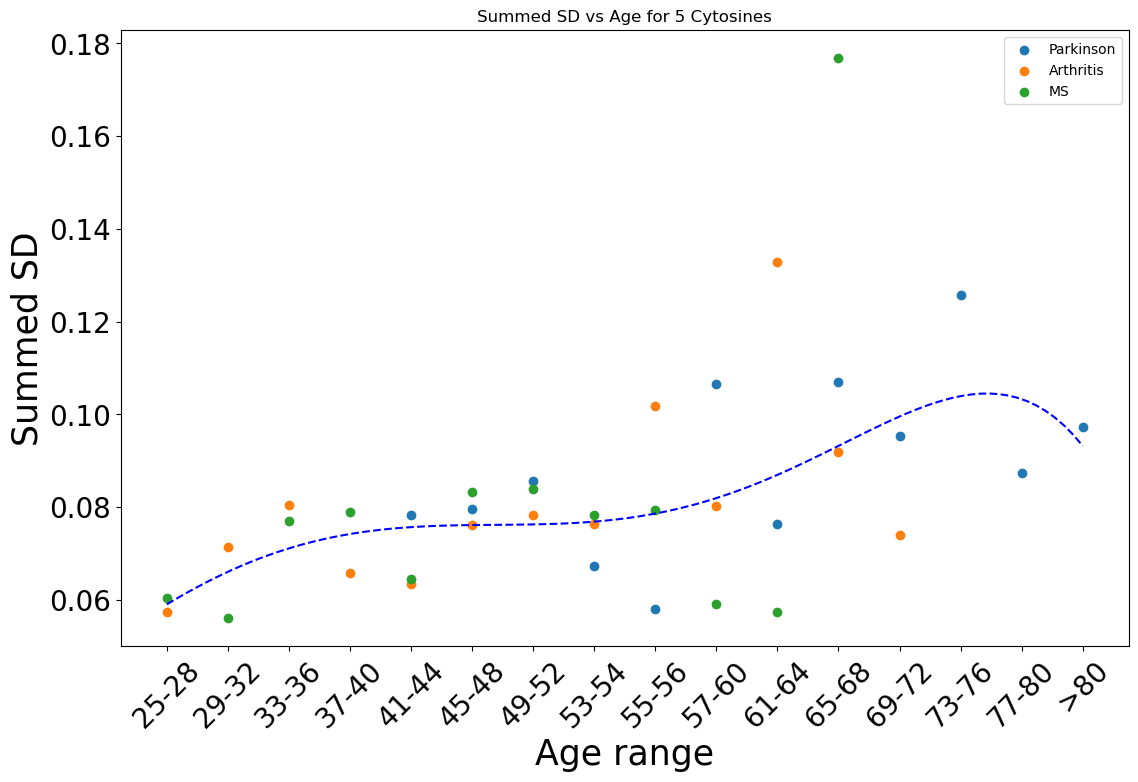

In [47]:
x = np.array(np.arange(16))
my_xticks = fig5b_143k.index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
for i in ['Parkinson', 'Arthritis', 'MS']:
    test = fig5b_5[i][:16]
    test = test.replace(0, np.nan)
    plt.scatter(x, test, label = i)

popt, pcov = curve_fit(poly_6, np.array(np.arange(16)),  fig5b_5['Median'][:16])
x_range = np.linspace(0, 15, 100)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
#plt.title("", fontsize=20)


#     zip_agegroup_SD = list(zip(x, hthy_SD[i]))
#     first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
#     second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

#     popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
#     x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
    
#     y_pred = poly_6(np.array(first_numbers), *popt)
#     y_true = second_numbers
#     mar = np.mean(np.abs(y_true - y_pred))
#     ssr = np.sum((y_pred - np.mean(y_true))**2)
#     sst = np.sum((y_true - np.mean(y_true))**2)
#     r2 = ssr/sst
#     print(str(i)+ f" healthy dataset has MAE: {mar:.5f} and R squared: {r2:.5f}")
plt.title('Summed SD vs Age for 5 Cytosines')
plt.xlabel('Age range', fontsize=25)
plt.ylabel('Summed SD', fontsize=25)
plt.legend()
plt.savefig('Summed_SD_vs_Age_for_5Cyt.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()


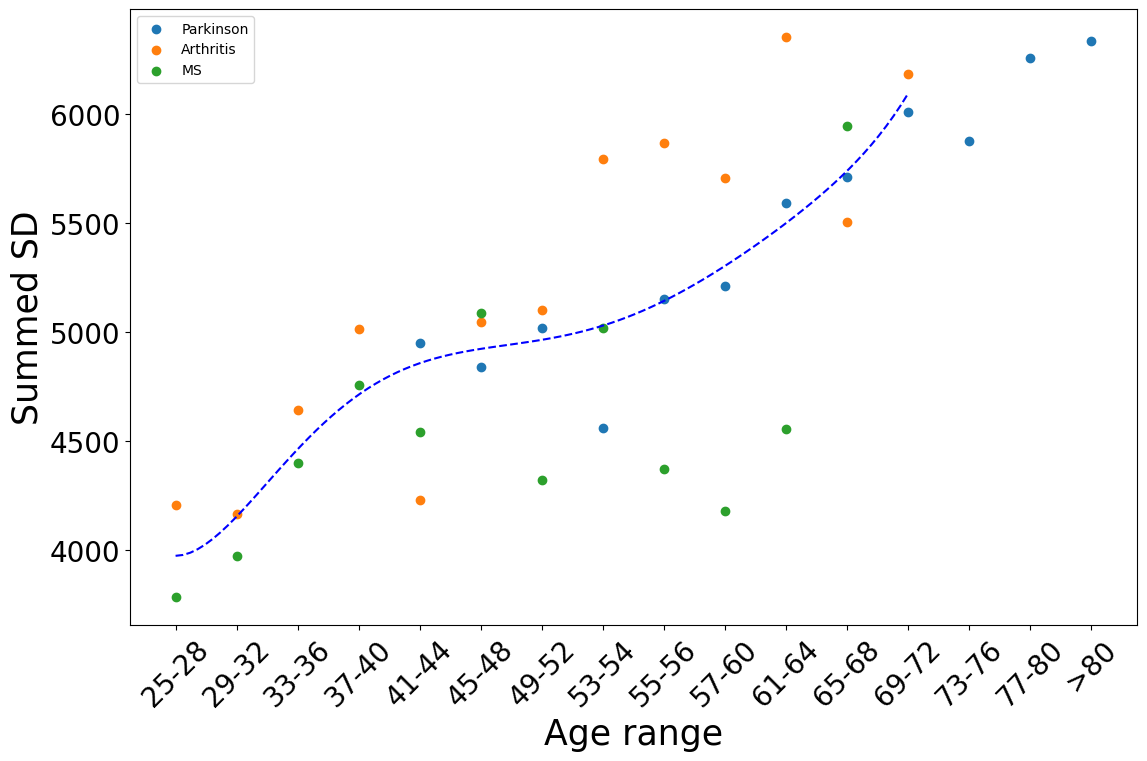

In [58]:
x = np.array(np.arange(16))
my_xticks = combine_healthy_3df_460.groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
for i in ['Parkinson', 'Arthritis', 'MS']:
    test = fig5b_5[i]
    test = test.replace(0, np.nan)
    plt.scatter(x, test, label = i)

popt, pcov = curve_fit(poly_6, np.array(np.arange(16)),  fig5b_5['Median'][:16])
x_range = np.linspace(0, 12, 100)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
#plt.title("", fontsize=20)


#     zip_agegroup_SD = list(zip(x, hthy_SD[i]))
#     first_numbers = [item[0] for item in zip_agegroup_SD if not math.isnan(item[1])]
#     second_numbers = [item[1] for item in zip_agegroup_SD if not math.isnan(item[1])]

#     popt, pcov = curve_fit(poly_6, first_numbers, second_numbers)
#     x_range = np.linspace(min(first_numbers), max(first_numbers), 100)
    
#     y_pred = poly_6(np.array(first_numbers), *popt)
#     y_true = second_numbers
#     mar = np.mean(np.abs(y_true - y_pred))
#     ssr = np.sum((y_pred - np.mean(y_true))**2)
#     sst = np.sum((y_true - np.mean(y_true))**2)
#     r2 = ssr/sst
#     print(str(i)+ f" healthy dataset has MAE: {mar:.5f} and R squared: {r2:.5f}")
plt.xlabel('Age range', fontsize=25)
plt.ylabel('Summed SD', fontsize=25)
plt.legend()
plt.show()

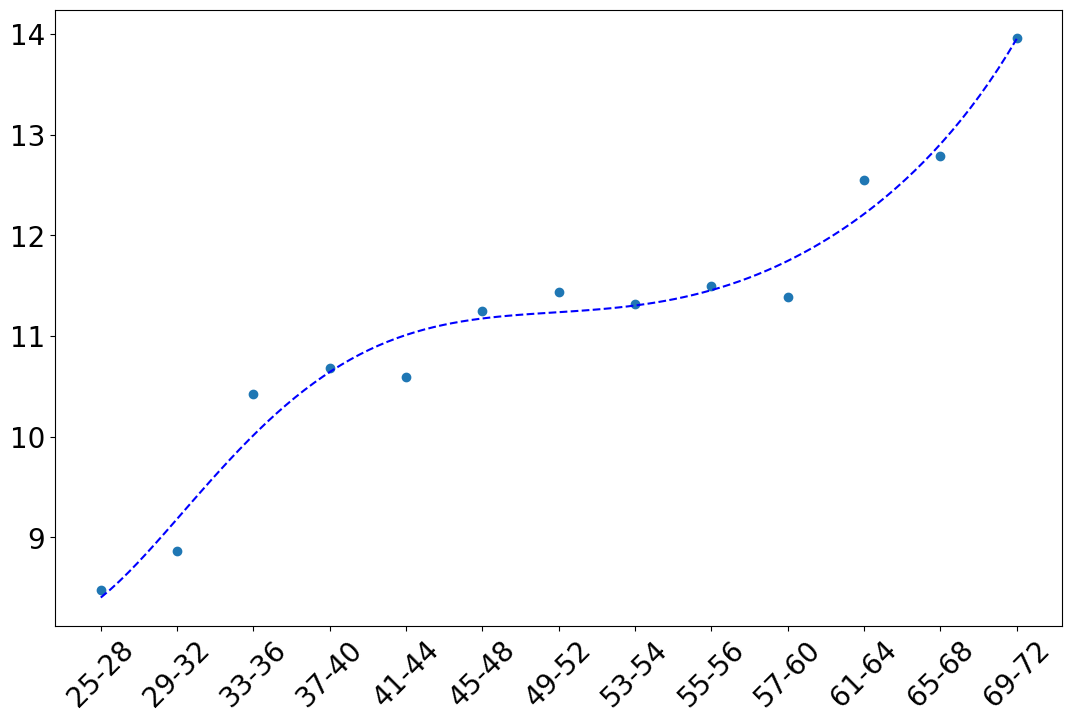

In [436]:
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.scatter(np.array(np.arange(0, 13)),fig5b_293['Median'][:13].to_list())
x_range = np.linspace(0, 12, 100)
my_xticks = combine_healthy_common[cpgs460].groupby('age_group').std().index.to_list()
plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.show()

In [442]:
# r squared, r**2, r^2
corr_m = np.corrcoef(fig5b['Median'][:8].to_list(),fig5b['Med_pred'][:8].to_list())
corr = corr_m[0,1]
r_sq = corr**2
r_sq

0.5504540180749931

In [74]:
healthy_all_std = pd.DataFrame(data={'young_std': combine_healthy_common[
    combine_healthy_common['Age'].between(25, 28,inclusive = 'both')].std(), 
                        'old_std': combine_healthy_common[combine_healthy_common['Age']>67].std(), 
                        'young_mean': combine_healthy_common[combine_healthy_common
                                                             ['Age'].between(25, 28,inclusive = 'both')].mean(),
                        'old_mean': combine_healthy_common[combine_healthy_common['Age']>67].mean()})
all_noisy = healthy_all_std[(healthy_all_std['young_std'] < healthy_all_std['old_std'])]
# all_noisy['O-Y/O'] = (all_noisy['old_mean']-all_noisy['young_mean'])/all_noisy['old_mean']
# all_noisy0001= all_noisy[all_noisy['O-Y/O'].between(-0.001, 0.001,inclusive = 'both')]
# hetero_mei_CpG = all_noisy0001.index.to_list()
# # b/w 25 and 28 yrs old 
# combine_healthy_common[combine_healthy_common['Age'].between(25, 28,inclusive = 'both')]
# # above age 28
# combine_healthy_common_28 = combine_healthy_common[combine_healthy_common['Age']>28]
# p = pd.DataFrame(pd.np.empty((1816,2)))
# for i in range(combine_healthy_common[hetero_mei_CpG].shape[1]):
#     p.iloc[i, 0] = combine_healthy_common[hetero_mei_CpG].columns[i]
#     column_i_name = combine_healthy_common[hetero_mei_CpG].columns[i]
#     p.iloc[i, 1] = np.corrcoef(combine_healthy_common[hetero_mei_CpG][column_i_name], combine_healthy_common["Age"])[0,1]
# # p = pd.DataFrame(list(zip(i_lst, corrcoef_lst)), columns = ["cpg", "values"])
# p = p.set_axis(['CpG', 'Coe'], axis='columns')  
# coe_002005 = p[p['Coe'].between(0.02, 0.05, inclusive = 'both')]['CpG'].to_list()
# len(coe_002005)

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/4273550713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  healthy_all_std = pd.DataFrame(data={'young_std': combine_healthy_common[
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/4273550713.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'old_std': combine_healthy_common[combine_healthy_common['Age']>67].std(),
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/4273550713.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid 

In [75]:
healthy_all_std

,young_std,old_std,young_mean,old_mean
cg00050873,0.211823,0.200020,0.575351,0.764835
cg00212031,0.270497,0.253144,0.381895,0.221335
cg00213748,0.243255,0.266573,0.544319,0.696117
cg00455876,0.220322,0.254771,0.466846,0.575022
cg01707559,0.109299,0.084397,0.198207,0.158203
...,...,...,...,...
cg27660038,0.017177,0.018523,0.116083,0.127073
cg27662284,0.098584,0.097747,0.758039,0.822316
cg27662611,0.041347,0.020557,0.100140,0.056972
cg27665648,0.044437,0.039123,0.789265,0.823859


In [80]:
CpG_SD460 = healthy_all_std.T[cpgs460].T
CpG_SD460[CpG_SD460['old_std']/CpG_SD460['young_std']>1.2]

,young_std,old_std,young_mean,old_mean
cg05639522,0.048705,0.078211,0.502716,0.503039
cg06649280,0.048592,0.086485,0.479364,0.479078
cg07367222,0.015689,0.100912,0.908131,0.907771
cg08137948,0.071575,0.093068,0.246606,0.246798
cg13446070,0.024725,0.032266,0.845772,0.846130
...,...,...,...,...
cg01021975,0.018920,0.026649,0.827632,0.827977
cg03873518,0.017480,0.126117,0.900125,0.900521
cg09322432,0.020430,0.033486,0.841426,0.842048
cg14543179,0.057022,0.089088,0.614485,0.614051


In [81]:
CpGs293 = CpG_SD460[CpG_SD460['old_std']/CpG_SD460['young_std']>1.2].index.tolist()

In [82]:
CpGs293

['cg05639522',
 'cg06649280',
 'cg07367222',
 'cg08137948',
 'cg13446070',
 'cg23603891',
 'cg26837773',
 'cg09606941',
 'cg10859133',
 'cg17942639',
 'cg22860848',
 'cg03637769',
 'cg08929133',
 'cg16239482',
 'cg05322332',
 'cg24979233',
 'cg25186874',
 'cg02084828',
 'cg24756698',
 'cg00512454',
 'cg05068156',
 'cg16739976',
 'cg25412448',
 'cg26570901',
 'cg09424415',
 'cg10592734',
 'cg26651148',
 'cg01614020',
 'cg03899054',
 'cg21193975',
 'cg12338214',
 'cg04085571',
 'cg09575189',
 'cg14433983',
 'cg25201101',
 'cg17878139',
 'cg19001789',
 'cg24852565',
 'cg19456540',
 'cg02395127',
 'cg22038124',
 'cg02402744',
 'cg08884074',
 'cg09521490',
 'cg09464728',
 'cg11613425',
 'cg13727849',
 'cg22842932',
 'cg22996004',
 'cg23148631',
 'cg25767345',
 'cg04178634',
 'cg05649427',
 'cg12062672',
 'cg13083129',
 'cg14080585',
 'cg25788719',
 'cg10415509',
 'cg20398123',
 'cg23272544',
 'cg00123001',
 'cg05088006',
 'cg15514224',
 'cg00532502',
 'cg00647881',
 'cg00763594',
 'cg020670

In [13]:
# white's test
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

In [87]:
f_sig_outof480k = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/f_sig_outof480k.xlsx',
             sheet_name='Sheet1')

In [88]:
f_sig_outof480k

,Unnamed: 0,name,LM Statistic,LM-Test p-value,F Statistic,F-Test p-value
0,0,cg00050873,43.772226,3.125949e-10,23.009652,1.873652e-10
1,1,cg00212031,32.831622,7.425128e-08,17.024019,5.666616e-08
2,2,cg00213748,31.513677,1.435133e-07,16.313928,1.121689e-07
3,3,cg00455876,31.873563,1.198792e-07,16.507600,9.309860e-08
4,4,cg01707559,27.461167,1.088638e-06,14.144957,9.092744e-07
...,...,...,...,...,...,...
372504,448845,cg27657537,8.078996,1.760631e-02,4.064219,1.751733e-02
372505,448847,cg27662284,9.828799,7.340123e-03,4.954922,7.257282e-03
372506,448848,cg27662611,39.366726,2.828943e-09,20.579668,1.886523e-09
372507,448849,cg27665648,48.396036,3.096951e-11,25.589214,1.636867e-11


In [53]:
hthy_SD = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='Healthy')
dis_SD = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='Disease')

In [124]:
# need to fill
hthy_SD_143k = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='143k_h')
hthy_SD_143k = hthy_SD_143k.replace(0, np.nan).set_index('Age_group')
hthy_SD_143k

,Parkinson's,Down Syndrome,IBS,MS,Arthritis
Age_group,,,,,
25-28,NaN,3706.451824,4254.150152,3785.625885,4206.114152
29-32,NaN,3888.092282,5091.720538,3975.292636,4167.117357
33-36,NaN,3559.457379,4830.480437,4400.851616,4642.692871
37-40,NaN,NaN,3428.576084,4755.415907,5012.352937
41-44,4950.141212,3150.149307,5037.717611,4543.727221,4232.505847
45-48,4841.919418,4011.254484,NaN,5087.485275,5048.026810
49-52,5020.910333,4034.818336,4953.464801,4322.430159,5103.682703
53-54,4559.910554,NaN,NaN,5019.055735,5794.659429
55-56,5151.516549,4552.905157,5029.024730,4374.693216,5866.696213


In [197]:
hthy_SD460 = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='460cpg_h')
dis_SD460 = pd.read_excel(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/dataset_SD.xlsx',
             sheet_name='460cpg_d')

hthy_SD460 = hthy_SD460.set_index('Age_group')
dis_SD460 = dis_SD460.set_index('Age_group')

In [33]:
# test for first cpg: cg00050873
# dependent variable
cg00050873_beta = combine_healthy_common['cg00050873']
# independent variable
cg00050873_age = combine_healthy_common['Age']
cg00050873_beta = sm.add_constant(cg00050873_beta)
cg00050873_model = sm.OLS(cg00050873_age, cg00050873_beta).fit()
# get residuals
cg00050873_resi = cg00050873_model.resid
# perform whites test
white_test = het_white(cg00050873_resi, cg00050873_model.model.exog)
# display results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))
# test success


{'LM Statistic': 43.772226124683314, 'LM-Test p-value': 3.125948845302641e-10, 'F-Statistic': 23.009651649281395, 'F-Test p-value': 1.8736522915093893e-10}


In [13]:
name, LM_Statistic, LM_P, F_Statistic, F_P = [], [], [], [], []
cg_age = combine_healthy_common['Age']
for i in combine_healthy_common.iloc[:,:-1]:
    cg_beta = combine_healthy_common[i]
    cg_beta = sm.add_constant(cg_beta)
    cg_model = sm.OLS(cg_age, cg_beta).fit()
    cg_resi = cg_model.resid
    white_test = het_white(cg_resi, cg_model.model.exog)
    a, b, c, d = white_test
    name.append(i)
    LM_Statistic.append(a)
    LM_P.append(b)
    F_Statistic.append(c)
    F_P.append(d)
heterosk_480k = pd.DataFrame(data={'name':name, 'LM Statistic': LM_Statistic, 
                   'LM-Test p-value': LM_P, 
                   'F Statistic': F_Statistic,
                   'F-Test p-value': F_P
                  })


In [45]:
#heterosk_480k.set_index('name')

In [28]:
heterosk_480k[(heterosk_480k['LM-Test p-value']<0.05) &(heterosk_480k['F-Test p-value']<0.05)]


,name,LM Statistic,LM-Test p-value,F Statistic,F-Test p-value
0,cg00050873,43.772226,3.125949e-10,23.009652,1.873652e-10
1,cg00212031,32.831622,7.425128e-08,17.024019,5.666616e-08
2,cg00213748,31.513677,1.435133e-07,16.313928,1.121689e-07
3,cg00455876,31.873563,1.198792e-07,16.507600,9.309860e-08
4,cg01707559,27.461167,1.088638e-06,14.144957,9.092744e-07
...,...,...,...,...,...
448845,cg27657537,8.078996,1.760631e-02,4.064219,1.751733e-02
448847,cg27662284,9.828799,7.340123e-03,4.954922,7.257282e-03
448848,cg27662611,39.366726,2.828943e-09,20.579668,1.886523e-09
448849,cg27665648,48.396036,3.096951e-11,25.589214,1.636867e-11


In [15]:
# f test significant, unequal variance of the beta values 
#(different SD but not sure if it is noiser in old compared to young)
f_sig_outof480k = heterosk_480k[heterosk_480k['F-Test p-value']<0.05]
f_sig_outof480k

In [10]:
# f_sig_outof480k.to_excel("/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/lab_data+code/datasets/f_sig_outof480k.xlsx",
#              sheet_name='Sheet1')  

In [415]:
seen1 = set()
repeated1 = set()
for l in [f_sig_outof480k['name'], f_sig_outof480k_lm['name']]:
    for i in set(l):
        if i in seen1:
            repeated1.add(i)
        else:
            seen1.add(i)          
            
len(repeated1)

372508

In [89]:
common_h_fsig = combine_healthy_common[f_sig_outof480k['name'].to_list()]
common_h_fsig['dataset'] = combine_healthy_common['dataset']
common_h_fsig['Age'] = combine_healthy_common['Age']
healthy_all_std = pd.DataFrame(data={'young_std': common_h_fsig[
    common_h_fsig['Age'].between(25, 28,inclusive = 'both')].std(), 
                        'old_std': common_h_fsig[common_h_fsig['Age']>67].std(), 
                        'young_mean': common_h_fsig[common_h_fsig
                                                             ['Age'].between(25, 28,inclusive = 'both')].mean(),
                        'old_mean': common_h_fsig[common_h_fsig['Age']>67].mean()})

# please pick which healthy_all_std pool would you like to select from, the 
# filters I applied is the 20perc in the following plots 
healthy_all_std['o_sd/y_sd'] = healthy_all_std['old_std']/healthy_all_std['young_std']
healthy_all_std_20perc = healthy_all_std[healthy_all_std['o_sd/y_sd']>=1.2]
#healthy_all_std_omorey = healthy_all_std[healthy_all_std['o_sd/y_sd']>1]

common_h_fsig = common_h_fsig[healthy_all_std_20perc.index.to_list()]
common_h_fsig['dataset'] = combine_healthy_common['dataset']
common_h_fsig['age_group'] = pd.cut(
    common_h_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
common_h_fsig

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_h_fsig['dataset'] = combine_healthy_common['dataset']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_h_fsig['Age'] = combine_healthy_common['Age']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_3078/2099671052.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reduct

,cg02011394,cg02494853,cg03695421,cg03706273,cg03767353,cg04016144,cg04023335,cg05480730,cg11131351,cg14210405,...,cg27512868,cg27528247,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age,dataset,age_group
0,0.278237,0.023765,0.000000,0.026480,0.498413,0.566893,0.102472,0.734807,0.000000,0.111952,...,0.893289,0.827940,0.924419,0.600085,0.116871,0.959207,0.909472,46.2,parknor,45-48
1,0.979937,0.018487,0.732449,0.014908,0.813016,0.949955,0.717820,0.008652,0.795950,0.316092,...,0.895520,0.834553,0.897510,0.604072,0.049683,0.938547,0.911306,66.0,parknor,65-68
2,0.616319,0.014499,0.364407,0.020311,0.694215,0.379141,0.232416,0.625551,0.475410,0.199224,...,0.868149,0.873413,0.900653,0.791084,0.051148,0.918317,0.901814,41.4,parknor,41-44
3,0.770335,0.028028,0.310023,0.109307,0.444186,0.417191,0.112794,1.000000,0.560345,0.209131,...,0.851541,0.876932,0.895756,0.812943,0.082006,0.942567,0.904906,42.4,parknor,41-44
4,0.390710,0.016192,0.457944,0.060808,0.668367,0.496689,0.131422,0.465306,1.000000,0.223716,...,0.891383,0.899428,0.929399,0.757748,0.271972,0.974692,0.915341,63.4,parknor,61-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.465241,0.013494,0.000000,0.019316,0.130137,0.067039,0.078756,0.000000,0.268156,0.129578,...,0.825476,0.809546,0.852788,0.616472,0.074764,0.897954,0.906122,48.0,down_nor,45-48
834,0.237569,0.018955,0.000000,0.029216,0.090909,0.074074,0.171127,0.000000,0.000000,0.183947,...,0.848925,0.855674,0.908585,0.474743,0.123818,0.902494,0.919701,58.0,down_nor,57-60
835,0.976255,0.012361,0.725019,0.010623,0.470508,0.953734,0.607951,0.024902,0.896761,0.401938,...,0.872787,0.835256,0.928185,0.586700,0.028438,0.904038,0.922268,44.0,Werner_Syndrome_h,41-44
836,0.390233,0.018297,0.287872,0.023396,0.403164,0.372904,0.076645,0.280558,0.369086,0.339271,...,0.701901,0.822342,0.915024,0.474364,0.048880,0.910285,0.929420,53.0,Werner_Syndrome_h,53-54


In [53]:
common_d_fsig = combine_dis_nohiv[healthy_all_std_20perc.index.to_list()]
common_d_fsig['dataset'] = combine_dis_nohiv['dataset']
common_d_fsig['age_group'] = pd.cut(
    common_d_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
common_d_fsig = common_d_fsig.dropna(axis=0)
common_d_fsig

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_53599/2869269545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_fsig['dataset'] = combine_dis_nohiv['dataset']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_53599/2869269545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_d_fsig['age_group'] = pd.cut(


In [82]:
# after two filters
common_h_fsig = combine_healthy_common[healthy_all_std_20perc.index.to_list()]
common_h_fsig

,cg02011394,cg02494853,cg03695421,cg03706273,cg03767353,cg04016144,cg04023335,cg05480730,cg11131351,cg14210405,...,cg27467114,cg27501362,cg27512868,cg27528247,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age
0,0.278237,0.023765,0.000000,0.026480,0.498413,0.566893,0.102472,0.734807,0.000000,0.111952,...,0.906596,0.974706,0.893289,0.827940,0.924419,0.600085,0.116871,0.959207,0.909472,46.2
1,0.979937,0.018487,0.732449,0.014908,0.813016,0.949955,0.717820,0.008652,0.795950,0.316092,...,0.828637,0.965411,0.895520,0.834553,0.897510,0.604072,0.049683,0.938547,0.911306,66.0
2,0.616319,0.014499,0.364407,0.020311,0.694215,0.379141,0.232416,0.625551,0.475410,0.199224,...,0.915946,0.905974,0.868149,0.873413,0.900653,0.791084,0.051148,0.918317,0.901814,41.4
3,0.770335,0.028028,0.310023,0.109307,0.444186,0.417191,0.112794,1.000000,0.560345,0.209131,...,0.895359,0.932588,0.851541,0.876932,0.895756,0.812943,0.082006,0.942567,0.904906,42.4
4,0.390710,0.016192,0.457944,0.060808,0.668367,0.496689,0.131422,0.465306,1.000000,0.223716,...,0.921640,0.921306,0.891383,0.899428,0.929399,0.757748,0.271972,0.974692,0.915341,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.465241,0.013494,0.000000,0.019316,0.130137,0.067039,0.078756,0.000000,0.268156,0.129578,...,0.818075,0.917934,0.825476,0.809546,0.852788,0.616472,0.074764,0.897954,0.906122,48.0
834,0.237569,0.018955,0.000000,0.029216,0.090909,0.074074,0.171127,0.000000,0.000000,0.183947,...,0.864925,0.922119,0.848925,0.855674,0.908585,0.474743,0.123818,0.902494,0.919701,58.0
835,0.976255,0.012361,0.725019,0.010623,0.470508,0.953734,0.607951,0.024902,0.896761,0.401938,...,0.860188,0.917649,0.872787,0.835256,0.928185,0.586700,0.028438,0.904038,0.922268,44.0
836,0.390233,0.018297,0.287872,0.023396,0.403164,0.372904,0.076645,0.280558,0.369086,0.339271,...,0.813483,0.920986,0.701901,0.822342,0.915024,0.474364,0.048880,0.910285,0.929420,53.0


In [11]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [37]:
hannum_cpg_pub = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_AllData')
Phenoage_cpg = pd.read_csv(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/PhenoAge_513CpG.csv')
PACEcpgs = pd.read_excel('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/pacecpg.xlsx')
PACEcpgs = PACEcpgs.iloc[1::2]
PACEcpgs = PACEcpgs.rename(columns={'Intercept':'cpg'})
PACEcpgs['coefficient'] =PACEcpgs.iloc[:,1]
hannum_cpg_all = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_AllData')
hannum_cpg_pri = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_PrimaryData')


In [14]:
# after two filters
common_h_fsig = combine_healthy_common[healthy_all_std_omorey.index.to_list()]

,cg00213748,cg00455876,cg02011394,cg02494853,cg02839557,cg03443143,cg03695421,cg03706273,cg03750315,cg03767353,...,cg27532722,cg27552198,cg27553637,cg27592453,cg27598806,cg27612019,cg27634071,cg27634744,cg27648216,Age
0,0.407407,0.353630,0.278237,0.023765,0.368526,0.368984,0.000000,0.026480,0.719078,0.498413,...,0.829637,0.891700,0.102599,0.868847,0.924419,0.600085,0.116871,0.959207,0.909472,46.2
1,0.929293,0.786912,0.979937,0.018487,0.032043,0.921351,0.732449,0.014908,0.026602,0.813016,...,0.851095,0.916508,0.072129,0.830520,0.897510,0.604072,0.049683,0.938547,0.911306,66.0
2,0.571429,0.368169,0.616319,0.014499,0.639944,0.757282,0.364407,0.020311,0.595238,0.694215,...,0.875740,0.906016,0.059329,0.852093,0.900653,0.791084,0.051148,0.918317,0.901814,41.4
3,0.329815,0.314706,0.770335,0.028028,0.596346,0.535248,0.310023,0.109307,0.387622,0.444186,...,0.822826,0.918693,0.069200,0.821845,0.895756,0.812943,0.082006,0.942567,0.904906,42.4
4,0.029851,0.174355,0.390710,0.016192,0.647520,0.652111,0.457944,0.060808,0.290640,0.668367,...,0.873549,0.916999,0.102231,0.856558,0.929399,0.757748,0.271972,0.974692,0.915341,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.109948,0.092784,0.465241,0.013494,0.121951,0.240964,0.000000,0.019316,0.350649,0.130137,...,0.717690,0.865867,0.054693,0.830734,0.852788,0.616472,0.074764,0.897954,0.906122,48.0
834,0.292517,0.287449,0.237569,0.018955,0.104167,0.126543,0.000000,0.029216,0.122807,0.090909,...,0.785430,0.885362,0.058470,0.885629,0.908585,0.474743,0.123818,0.902494,0.919701,58.0
835,0.859101,0.881824,0.976255,0.012361,0.024268,0.870739,0.725019,0.010623,0.023949,0.470508,...,0.821329,0.882974,0.048566,0.926457,0.928185,0.586700,0.028438,0.904038,0.922268,44.0
836,0.312797,0.351411,0.390233,0.018297,0.370549,0.357393,0.287872,0.023396,0.378231,0.403164,...,0.628894,0.845292,0.046336,0.906036,0.915024,0.474364,0.048880,0.910285,0.929420,53.0


In [90]:
common_h_fsig['dataset'] = combine_healthy_common['dataset']

In [16]:
# first filter about change in methylation status (+/-0.001 is the limit)
# if O mean / Y mean > 1.001, the cpg is reported to be increase in methylation
# between will be reported to be highly regulated
# if O/Y < 0.999, the cpg is reported to be decrease in methylation
healthy_all_std['O/Y'] = healthy_all_std['old_mean']/healthy_all_std['young_mean']

# healthy_all_std['change as age'] = None

# healthy_all_std.loc[healthy_all_std['O/Y'].between(1-0.001, 1+0.001,inclusive = 'both'),'change as age'] = 'highly regulated'
# healthy_all_std.loc[healthy_all_std['O/Y']>1+0.001,'change as age'] = 'increase in methylation'
# healthy_all_std.loc[healthy_all_std['O/Y']<1-0.001,'change as age'] = 'decrease in methylation'


In [17]:
# healthy_all_std[healthy_all_std['change as age'] =='highly regulated']
# healthy_all_std = healthy_all_std.drop(columns = 'status')


In [240]:
# second filter, using the average beta values, classify to unmethylated, half-methylated, and nearly methylated
healthy_all_std['status'] = None
healthy_all_std.loc[healthy_all_std['young_mean'].between(0.01, 0.1, inclusive = 'both'), 'status'] = 'unmethylated' 
healthy_all_std.loc[healthy_all_std['young_mean'].between(0.4, 0.6, inclusive = 'both'), 'status'] = 'half_methylated'
healthy_all_std.loc[healthy_all_std['young_mean']>0.9, 'status'] = 'nearly methylated'


In [225]:
healthy_all_std

,young_std,old_std,young_mean,old_mean,o_sd/y_sd,O/Y,status
cg00050873,0.211823,0.200020,0.575351,0.764835,0.944278,1.329336,half_methylated
cg00212031,0.270497,0.253144,0.381895,0.221335,0.935848,0.579572,None
cg00213748,0.243255,0.266573,0.544319,0.696117,1.095856,1.278877,half_methylated
cg00455876,0.220322,0.254771,0.466846,0.575022,1.156359,1.231718,half_methylated
cg01707559,0.109299,0.084397,0.198207,0.158203,0.772164,0.798175,None
...,...,...,...,...,...,...,...
cg27657537,0.043948,0.016469,0.121561,0.101147,0.374732,0.832066,None
cg27662284,0.098584,0.097747,0.758039,0.822316,0.991508,1.084794,None
cg27662611,0.041347,0.020557,0.100140,0.056972,0.497174,0.568926,None
cg27665648,0.044437,0.039123,0.789265,0.823859,0.880409,1.043831,None


In [83]:
common_h_fsig['age_group'] = pd.cut(
    common_h_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_41928/3181615318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_h_fsig['age_group'] = pd.cut(


In [95]:
common_d_fsig = combine_dis_nohiv[combine_dis_nohiv.columns.intersection(common_h_fsig.columns)]
common_d_fsig['age_group'] = pd.cut(
    common_d_fsig['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])


In [96]:
sumSD_450k = combine_healthy_common.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1)


In [98]:
sumSD_450k

age_group
25-28    18628.112340
29-32    20322.851489
33-36    19511.737425
37-40    17110.659051
41-44    20401.540949
45-48    17728.758675
49-52    18527.133658
53-54    17522.170694
55-56    19933.668731
57-60    18998.690850
61-64    19597.586753
65-68    18883.995492
69-72    19514.367833
73-76    16766.052533
77-80    16688.433675
>80      17723.414443
dtype: float64

In [97]:
sumSD_allpassed2filters = common_h_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1)
sumSD_allpassed2filters

age_group
25-28    4934.512259
29-32    5649.950369
33-36    5614.285124
37-40    5456.740925
41-44    6222.094886
45-48    6334.183014
49-52    6138.471744
53-54    6365.531793
55-56    6871.122439
57-60    6456.975769
61-64    7279.838231
65-68    7001.236316
69-72    7495.151005
73-76    6109.025964
77-80    6258.701235
>80      6612.247474
dtype: float64

In [55]:
sumSD_allpassed2filters_d = common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1)
sumSD_allpassed2filters_d

age_group
25-28    5960.977683
29-32    6316.163599
33-36    6239.509025
37-40    6409.694383
41-44    6082.879791
45-48    5343.188323
49-52    6759.374105
53-54    7087.559185
55-56    6058.747969
57-60    7013.914162
61-64    7211.706895
65-68    7524.992705
69-72    6828.939525
73-76    7773.924999
77-80    6581.924806
>80      6492.824375
dtype: float64

In [105]:
sumSD_allpassed2filters_d = common_d_fsig.dropna(axis=0).groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1)
sumSD_allpassed2filters_d
# if the data looks slightly larger, do .dropna(axis=0) right after the dataset

age_group
25-28    5960.977683
29-32    6316.163599
33-36    6239.509025
37-40    6409.694383
41-44    6082.879791
45-48    5343.188323
49-52    6759.374105
53-54    7087.559185
55-56    6058.747969
57-60    7013.914162
61-64    7211.706895
65-68    7524.992705
69-72    6828.939525
73-76    7773.924999
77-80    6581.924806
>80      6492.824375
dtype: float64

In [93]:
cpg5=['cg01614020', 'cg19028499', 'cg06626168', 'cg05184256', 'cg24366087','age_group']


In [132]:
cpgs460.append('age_group')

In [88]:
sumSD_460_h = combine_healthy_common[cpgs460].groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()
sumSD_460_h

,0
age_group,
25-28,16.678672
29-32,19.037258
33-36,18.955976
37-40,18.131689
41-44,20.085056
45-48,19.741567
49-52,19.787605
53-54,19.883937
55-56,21.260276


In [134]:
sumSD_460_d = combine_dis_nohiv[cpgs460].groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()
sumSD_460_d

,0
age_group,
25-28,20.886679
29-32,20.106011
33-36,20.341813
37-40,20.262274
41-44,19.424020
45-48,19.202541
49-52,20.830576
53-54,21.811390
55-56,18.911720


In [47]:
sumSD_5_h = combine_healthy_common[cpg5].groupby('age_group').std().dropna(axis=0).sum(axis=1)
sumSD_5_h


age_group
25-28    0.058271
29-32    0.071442
33-36    0.077302
37-40    0.072601
41-44    0.072284
45-48    0.087428
49-52    0.089362
53-54    0.080230
55-56    0.100590
57-60    0.086927
61-64    0.125157
65-68    0.111000
69-72    0.094010
73-76    0.124236
77-80    0.087313
>80      0.096879
dtype: float64

In [48]:
sumSD_5_d = combine_dis_nohiv[cpg5].groupby('age_group').std().sum(axis=1)
sumSD_5_d

age_group
25-28    0.076967
29-32    0.077019
33-36    0.086791
37-40    0.084534
41-44    0.073543
45-48    0.088685
49-52    0.105175
53-54    0.090711
55-56    0.079485
57-60    0.088709
61-64    0.104910
65-68    0.082764
69-72    0.107563
73-76    0.148181
77-80    0.108901
>80      0.117610
dtype: float64

In [94]:
CpGs293.append('age_group')

In [95]:
sumSD_293_d = combine_dis_nohiv[CpGs293].groupby('age_group').std().sum(axis=1)
sumSD_293_h = combine_healthy_common[CpGs293].groupby('age_group').std().sum(axis=1)


In [155]:
combine_dis_nohiv.groupby('age_group').std()['cg26570901']


age_group
25-28    1.173257
29-32    1.047794
33-36    1.010503
37-40    1.030444
41-44    1.157216
45-48    1.063080
49-52    1.078830
53-54    0.621947
55-56    0.541033
57-60    1.156130
61-64    1.076605
65-68    1.298920
69-72    1.217385
73-76    1.102782
77-80    1.100902
>80      2.554082
Name: Age, dtype: float64

In [153]:
combine_dis_nohiv['cg26570901']

0      0.240722
1      0.144862
2      0.088056
3      0.365234
4      0.235585
         ...   
961    0.343948
962    0.278054
965    0.386943
966    0.344778
967    0.448218
Name: cg26570901, Length: 899, dtype: float64

In [111]:
combine_healthy_common.groupby('age_group').std()['cg25600933'].to_frame()

,cg25600933
age_group,
25-28,0.056607
29-32,0.047616
33-36,0.039078
37-40,0.048929
41-44,0.061924
45-48,0.052842
49-52,0.060506
53-54,0.091030
55-56,0.063154


In [123]:
combine_healthy_common.groupby('age_group_larger').std()['cg25600933']

age_group_larger
25-28    0.056607
29-32    0.047616
33-36    0.039078
37-40    0.048929
41-44    0.061924
45-48    0.052842
49-52    0.060506
53-57    0.076219
58-64    0.079330
65-68    0.077702
69-72    0.100005
73-76    0.083308
77-80    0.095450
>80      0.121147
Name: cg25600933, dtype: float64

In [157]:
combine_healthy_common['age_group_larger'] = pd.cut(
    combine_healthy_common['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_dis_nohiv['age_group_larger'] = pd.cut(
    combine_dis_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])


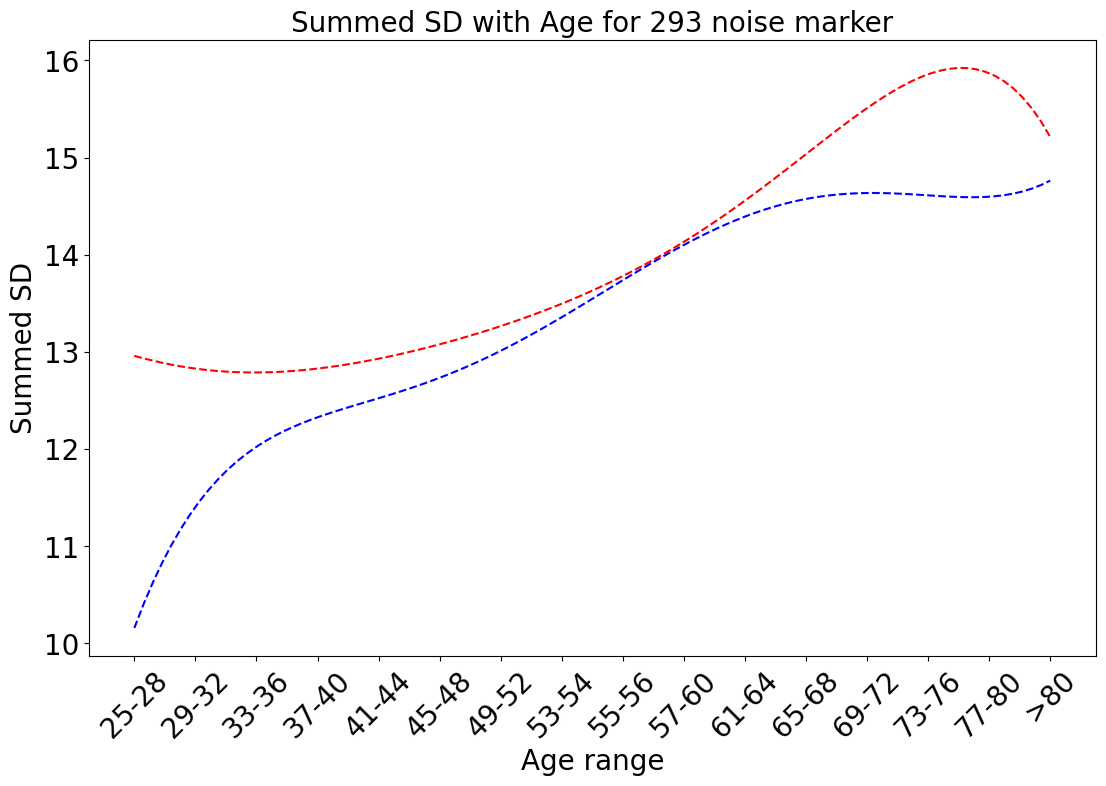

In [98]:
x = np.array(np.arange(16))
my_xticks = combine_dis_nohiv[cpg5].groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, sumSD_293_h)
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, sumSD_293_d)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 293 noise marker", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

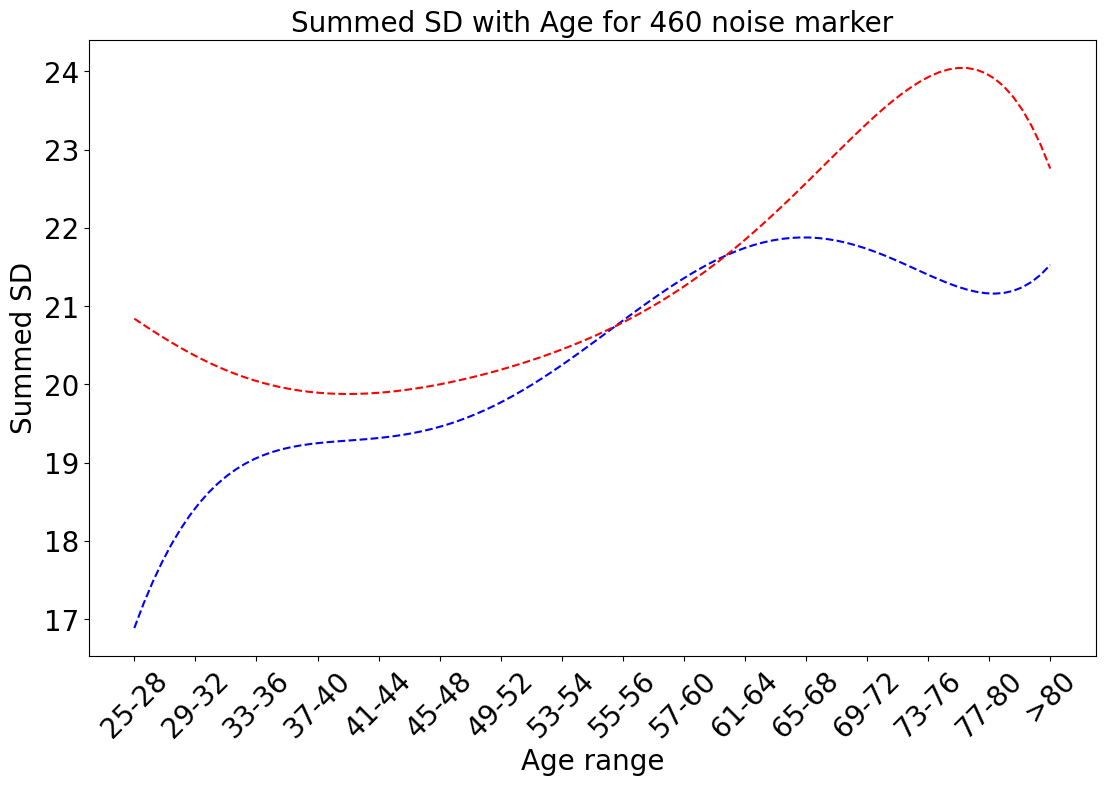

( 7.701089543621364e-06  * x) + ( -6.878578645030942e-05 * x**2) + ( -0.00510972478572258  * x**3) +  ( 0.10668875155744661  * x**4) + ( -0.7320635799991313  * x**5) + ( 2.164951389587835 * x**6) + ( 16.8876389725564 )


In [138]:
x = np.array(np.arange(16))
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, sumSD_460_h[0])
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, sumSD_460_d[0])

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 460 noise marker", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)
a,b,c,d,e,f,g = popt
plt.show()
print('(',a,' * x) + (',b, '* x**2) + (',c,' * x**3) + ','(',d,' * x**4) + (',e,' * x**5) + (',f,'* x**6) + (',g,')')


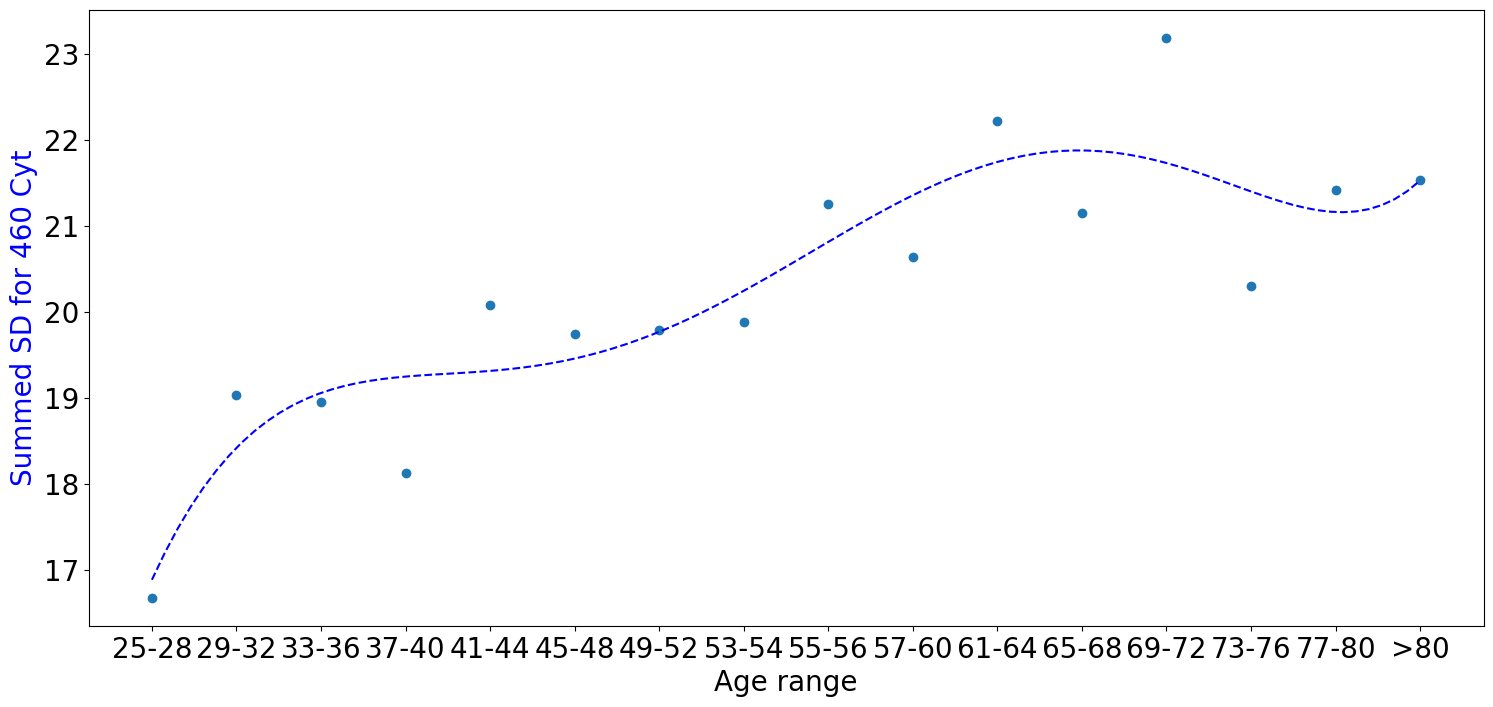

In [156]:
x = np.array(np.arange(16))
#my_xticks = combine_dis_nohiv[cpg5].groupby('age_group').std().index.to_list()

fig,ax = plt.subplots(figsize=(18, 8))

ax.set_xticks(x, my_xticks,fontsize=20)

popt, pcov = curve_fit(poly_6, x, sumSD_460_h[0])
x_range = np.linspace(0, 15, 100)

ax.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
ax.scatter(x, sumSD_460_h[0])
# set primary x-axis label
ax.set_xlabel('Age range', fontsize=20)
# set left y-axis label
ax.set_ylabel('Summed SD for 460 Cyt', color = 'b', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.show()
# save the plot as a file, store, location
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')



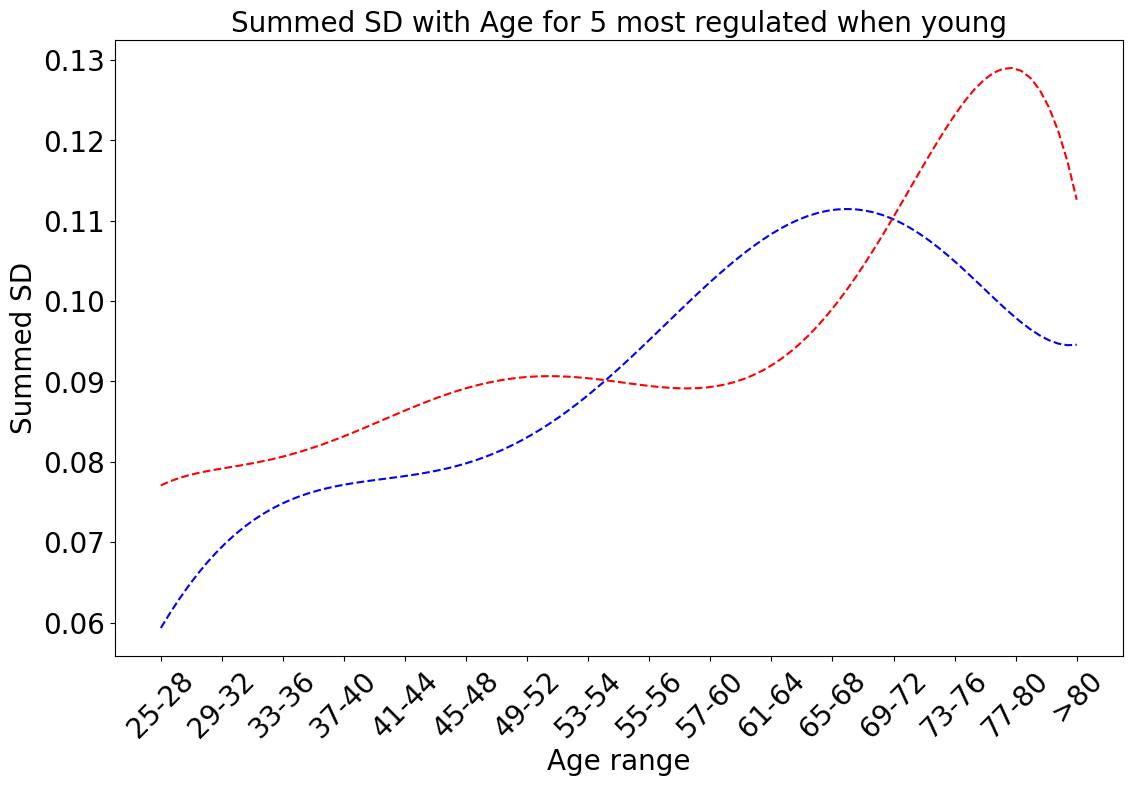

In [50]:
x = np.array(np.arange(16))
my_xticks = combine_dis_nohiv[cpg5].groupby('age_group').std().index.to_list()
plt.figure(figsize=(13, 8))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')
popt, pcov = curve_fit(poly_6, x, sumSD_5_h)
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, sumSD_5_d)

plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
plt.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')
plt.title("Summed SD with Age for 5 most regulated when young", fontsize=20)
plt.xlabel('Age range', fontsize=20)
plt.ylabel('Summed SD', fontsize=20)

plt.show()

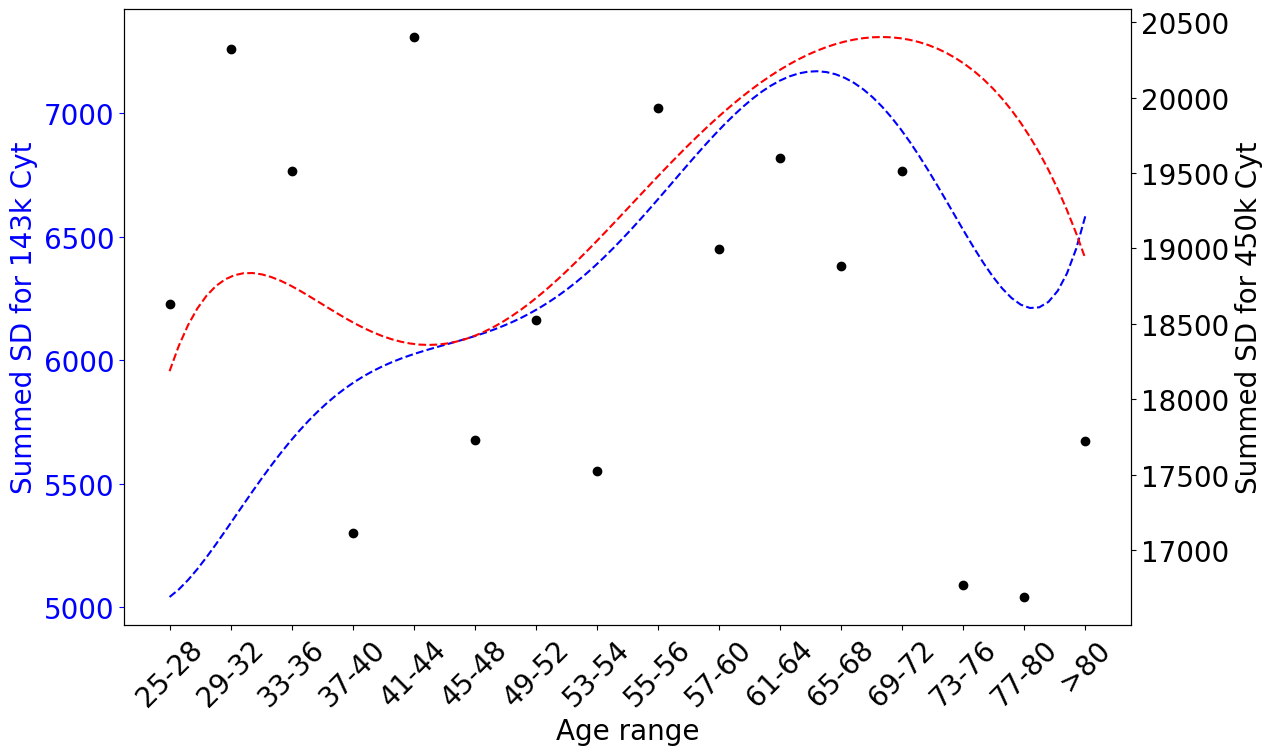

In [129]:
# there are 143450 cpgs in total passing the two filters without classification
x = np.array(np.arange(16))
my_xticks = common_h_fsig.groupby('age_group').std().index.to_list()
# plt.scatter(x, common_d_fsig.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1),color = 'r')

fig,ax = plt.subplots(figsize=(13, 8))

ax.set_xticks(x, my_xticks,fontsize=20, rotation=45)

popt, pcov = curve_fit(poly_6, x, sumSD_allpassed2filters)
x_range = np.linspace(0, 15, 100)

popt_d, pcov_d = curve_fit(poly_6, x, sumSD_allpassed2filters_d)

ax.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle='--')
ax.plot(x_range, poly_6(x_range, *popt_d),color = 'r', linestyle='--')

# set primary x-axis label
ax.set_xlabel('Age range', fontsize=20)
# set left y-axis label
ax.set_ylabel('Summed SD for 143k Cyt', color = 'b', fontsize=20)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax.tick_params(axis='y', labelsize=20, colors = 'blue')
ax2.tick_params(axis='y', labelsize=20)

ax2.scatter(x, sumSD_450k,color = 'black')
ax2.set_ylabel('Summed SD for 450k Cyt', color='black', fontsize=20)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
# comment the next two lines to erase the scatter dots
# y_pred = poly_6(x, *popt)
# y_true = sumSD_allpassed2filters
# mar = np.mean(np.abs(y_true - y_pred))
# ssr = np.sum((y_pred - y_true.mean())**2)
# sst = np.sum((y_true - y_true.mean())**2)
# r2 = ssr/sst
# print(f"Healthy data MAE: {mar:.5f}")
# print(f"Healthy data R squared: {r2:.5f}")


In [48]:
def sumSD_plot(df, title, line):
    sumSD_df = df.groupby('age_group').std().dropna(axis=0).sum(axis=1)
    x = np.array(np.arange(len(sumSD_df)))
    my_xticks = df.groupby('age_group').std().dropna(axis=0).index.to_list()
    plt.figure(figsize=(13, 8))
    plt.xticks(x, my_xticks)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.scatter(x, df.groupby('age_group').std().dropna(axis=0).sum(axis=1),color = 'b')
    popt, pcov = curve_fit(poly_6, x, sumSD_df)
    x_range = np.linspace(0, len(sumSD_df)-1, 100)
    plt.plot(x_range, poly_6(x_range, *popt),color = 'b', linestyle = line)
    plt.title("Summed SD with Age for " + str(title) +" CpGs Passed 2 Filters", fontsize=20)
    plt.xlabel('Age range', fontsize=20)
    plt.ylabel('Summed SD', fontsize=20)
    
    y_pred = poly_6(x, *popt)
    y_true = sumSD_df
    mar = np.mean(np.abs(y_true - y_pred))
    ssr = np.sum((y_pred - y_true.mean())**2)
    sst = np.sum((y_true - y_true.mean())**2)
    r2 = ssr/sst
    print(f"MAE: {mar:.5f}")
    print(f"R squared: {r2:.5f}")
    plt.show()
    